In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import datetime

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('tab10')

# 1 - Description des données

Les données portent sur les utilisateurs et les opérations marketing de l'entreprise.
Cette entreprise vend différents types de produits (aliments, vin, or), via différents canaux (catalogue, site web, magasin), et dans plusieurs pays.

Colonnes :
- `ID` - Customer's unique identification
- `Year_Birth` - Customer's birth year
- `Education` - Customer's education
- `Marital_Status` - Customer's marital status
- ` Income` - Customer's yearly household income
- `Kidhome` - # of kids in household
- `Teenhome` - # of teenagers in household
- `Dt_Customer` - Date of customer's enrollment with the company
- `Recency` - # of days since customer's last purchase
- `MntWines` - Amount spent on wine in the last 2 years
- `MntFruits` - Amount spent on fruit in the last 2 years
- `MntMeatProducts` - Amount spent on meat in the last 2 years
- `MntFishProducts` - Amount spent on fish in the last 2 years
- `MntSweetProducts` - Amount spent on sweet products in the last 2 years
- `MntGoldProds` - Amount spent on gold products in the last 2 years
- `NumDealsPurchases` - # of purchases made with a discount
- `NumWebPurchases` - # of purchases made on company website
- `NumCatalogPurchases` - # of purchases made on the catalog
- `NumStorePurchases` - # of purchase made in store
- `NumWebVisitsMonth` - # of website visits in the last month
- `AcceptedCmp1` - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2` - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3` - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4` - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5` - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response` - 1 if customer accepted the offer in the last campaign, 0 otherwise
- `Complain` - 1 if customer complained within the last 2 years
- `Country` - Country where the customer is located (not from)

In [3]:
df = pd.read_csv("marketing_data.csv", sep=",")
df

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0      1826        1970  Graduation       Divorced  $84,835.00         0   
1         1        1961  Graduation         Single  $57,091.00         0   
2     10476        1958  Graduation        Married  $67,267.00         0   
3      1386        1967  Graduation       Together  $32,474.00         1   
4      5371        1989  Graduation         Single  $21,474.00         1   
...     ...         ...         ...            ...          ...      ...   
2235  10142        1976         PhD       Divorced  $66,476.00         0   
2236   5263        1977    2n Cycle        Married  $31,056.00         1   
2237     22        1976  Graduation       Divorced  $46,310.00         1   
2238    528        1978  Graduation        Married  $65,819.00         0   
2239   4070        1969         PhD        Married  $94,871.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0     6/16/14        0       189        104              379   
1            0     6/15/14        0       464          5               64   
2            1     5/13/14        0       134         11               59   
3            1     5/11/14        0        10          0                1   
4            0      4/8/14        0         6         16               24   
...        ...         ...      ...       ...        ...              ...   
2235         1      3/7/13       99       372         18              126   
2236         0     1/22/13       99         5         10               13   
2237         0     12/3/12       99       185          2               88   
2238         0    11/29/12       99       267         38              701   
2239         2      9/1/12       99       169         24              553   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 111               189           218                  1   
1                   7                 0            37                  1   
2                  15                 2            30                  1   
3                   0                 0             0                  1   
4                  11                 0            34                  2   
...               ...               ...           ...                ...   
2235               47                48            78                  2   
2236                3                 8            16                  1   
2237               15                 5            14                  2   
2238              149               165            63                  1   
2239              188                 0           144                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   4                    4                  6   
1                   7                    3                  7   
2                   3                    2                  5   
3                   1                    0                  2   
4                   3                    1                  2   
...               ...                  ...                ...   
2235                5                    2                 11   
2236                1                    0                  3   
2237                6                    1                  5   
2238                5                    4                 10   
2239                8                    5                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     1             0             0             0   
1                     5             0             0             0   
2                     2             0             0             0   
3                     7             0             0             0   
4                     7             1             0             0   
...                 ...           ...           ...           .

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

# 2 - Exploration des données
## 2.a - Nettoyage des données

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [6]:
# Suppression de l'espace en trop dans le nom de la colonne 'Income'
df.columns = df.columns.str.replace(' ', '')

# Suppression du signe $ et passage de 'Income' en float
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

# Suppression des valeurs nulles dans 'Income'
df = df.dropna()

<ipython-input-6-b5196c24447b>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace('$', '')


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2216.000000       2216.000000   2216.000000        2216.000000   
mean         37.637635         27.028881     43.965253           2.323556   
std          54.752082         41.072046     51.815414           1.923716   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.500000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        262.000000    321.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2216.000000          2216.000000        2216.000000   
mean          4.085289             2.671029           5.800993   
std           2.740951             2.926734           3.250785   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.319043      0.073556      0.074007      0.073105   
std             2.425359      0.261106      0.261842      0.260367   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain  
count   2216.000000   2216.000000  2216.000000  2216.000000  
mean       0.064079      0.013538     0.150271     0.009477  
std        0.244950      0.115588     0.357417     0.096907  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000

### Valeurs aberrantes

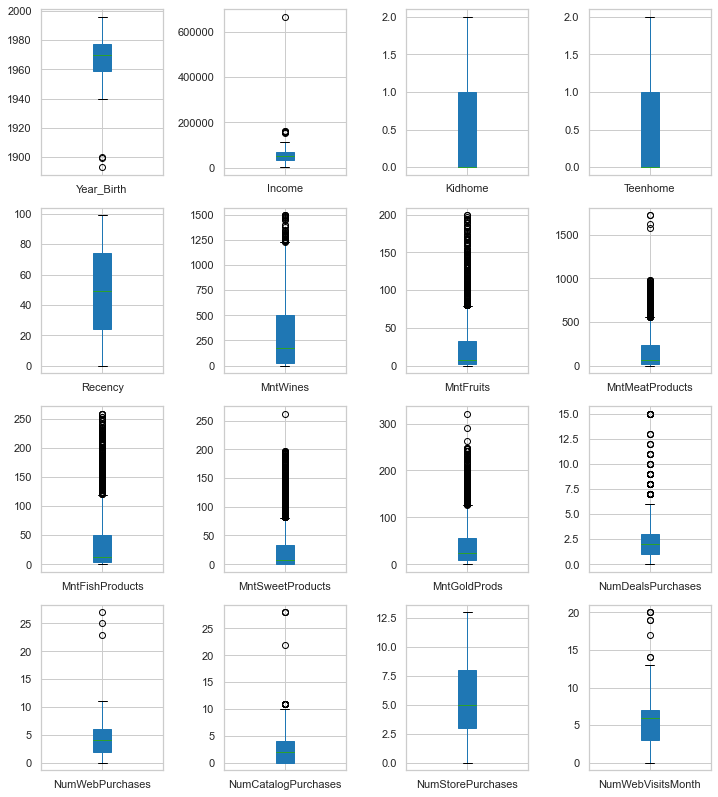

In [9]:
# Recherche de valeurs aberrantes dans certaines variables
df_plotbox = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

df_plotbox.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

#### 'Year_Birth'

In [10]:
print (np.sort(df['Year_Birth'].unique()))

[1893 1899 1900 1940 1941 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996]


In [11]:
# Suppression des valeurs aberrantes
df = df.drop([513, 827, 2171,2233])
df.loc[df['Year_Birth'] <= 1939]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Response, Complain, Country]
Index: []

#### 'Income'

In [12]:
print (np.sort(df['Income'].unique()))

[  1730.   2447.   3502. ... 160803. 162397. 666666.]


In [13]:
df.loc[df['Income'] == 666666]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
527  9432        1977  Graduation       Together  666666.0        1         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
527      6/2/13       23         9         14               18   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
527                8                 1            12                  4   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
527                3                    1                  3   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
527                  6             0             0             0   

     AcceptedCmp1  AcceptedCmp2  Response  Complain Country  
527             0             0         0         0      SA

In [14]:
# Suppression de la ligne avec un 'Income' de 66666, qui est probablement une erreur
df = df.drop([527])
df.loc[df['Income'] == 666666]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Response, Complain, Country]
Index: []

#### 'Marital Status'

In [15]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [16]:
# Correction des variables pour rester sur deux possibilités
df["Marital_Status"].replace({"Alone": "Single", "Divorced": "Single", "Widow": "Single", "YOLO": "Single", "Absurd": "Single"}, inplace=True)

#### 'Education'

In [17]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

## 2b - Modification et création de variable
#### Changement de type pour 'Dt_customer'

In [18]:
# 'Dt_customer' peut être transformé en datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2211 non-null   int64         
 1   Year_Birth           2211 non-null   int64         
 2   Education            2211 non-null   object        
 3   Marital_Status       2211 non-null   object        
 4   Income               2211 non-null   float64       
 5   Kidhome              2211 non-null   int64         
 6   Teenhome             2211 non-null   int64         
 7   Dt_Customer          2211 non-null   datetime64[ns]
 8   Recency              2211 non-null   int64         
 9   MntWines             2211 non-null   int64         
 10  MntFruits            2211 non-null   int64         
 11  MntMeatProducts      2211 non-null   int64         
 12  MntFishProducts      2211 non-null   int64         
 13  MntSweetProducts     2211 non-nul

#### Création de variables

In [19]:
# Une variable 'MntTotal' (montal total des dépenses) peut être créée à partir des variables 'Mnt...'
tot_mnt = [col for col in df.columns if 'Mnt' in col]
df['MntTotal'] = df[tot_mnt].sum(axis=1)

# Une variable "Totalpurchases" (total des achats) à partir des différentes variables '...Purchases' sauf promotion
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumStorePurchases'] + df['NumCatalogPurchases']

# Une variable 'TotalCampaignsAcc' pour le nombre total de campagnes acceptées
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

# Une variable 'Customer_age_enr' pour l'âge au moment de l'inscription des clients
df['Customer_Age_Enr'] = df['Dt_Customer'].dt.year - df['Year_Birth']

# Fusion des colonnes 'Kidhome' et 'Teenhome' en 'DependentHome' car l'analyse ne différenciera pas enfants et adolescents
df['DependentHome'] = df['Kidhome'] + df['Teenhome']
df = df.drop(['Kidhome', 'Teenhome'], axis = 1)

# Une variable âge du client
df['Customer_age'] = datetime.datetime.now().year - df['Year_Birth']

# Depuis combien de temps le client est inscrit, en jours
df['Customer_duration_days'] = datetime.datetime.now() - df['Dt_Customer']
df['Customer_duration_days'] = df['Customer_duration_days'].apply(lambda x: x.days)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      2211 non-null   int64         
 1   Year_Birth              2211 non-null   int64         
 2   Education               2211 non-null   object        
 3   Marital_Status          2211 non-null   object        
 4   Income                  2211 non-null   float64       
 5   Dt_Customer             2211 non-null   datetime64[ns]
 6   Recency                 2211 non-null   int64         
 7   MntWines                2211 non-null   int64         
 8   MntFruits               2211 non-null   int64         
 9   MntMeatProducts         2211 non-null   int64         
 10  MntFishProducts         2211 non-null   int64         
 11  MntSweetProducts        2211 non-null   int64         
 12  MntGoldProds            2211 non-null   int64   

In [21]:
cols = df.columns.tolist()
cols

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country',
 'MntTotal',
 'TotalPurchases',
 'TotalCampaignsAcc',
 'Customer_Age_Enr',
 'DependentHome',
 'Customer_age',
 'Customer_duration_days']

In [22]:
df = df[['ID',
 'Year_Birth',
 'Customer_age',
 'Education',
 'Marital_Status',
 'Income',
 'DependentHome',
 'Dt_Customer',
 'Customer_duration_days',
 'Customer_Age_Enr',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'MntTotal',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'TotalPurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'TotalCampaignsAcc',
 'Response',
 'Complain',
 'Country']]
df

ID  Year_Birth  Customer_age   Education Marital_Status   Income  \
0      1826        1970            52  Graduation         Single  84835.0   
1         1        1961            61  Graduation         Single  57091.0   
2     10476        1958            64  Graduation        Married  67267.0   
3      1386        1967            55  Graduation       Together  32474.0   
4      5371        1989            33  Graduation         Single  21474.0   
...     ...         ...           ...         ...            ...      ...   
2235  10142        1976            46         PhD         Single  66476.0   
2236   5263        1977            45    2n Cycle        Married  31056.0   
2237     22        1976            46  Graduation         Single  46310.0   
2238    528        1978            44  Graduation        Married  65819.0   
2239   4070        1969            53         PhD        Married  94871.0   

      DependentHome Dt_Customer  Customer_duration_days  Customer_Age_Enr  \
0                 0  2014-06-16                    2831                44   
1                 0  2014-06-15                    2832                53   
2                 1  2014-05-13                    2865                56   
3                 2  2014-05-11                    2867                47   
4                 1  2014-04-08                    2900                25   
...             ...         ...                     ...               ...   
2235              1  2013-03-07                    3297                37   
2236              1  2013-01-22                    3341                36   
2237              1  2012-12-03                    3391                36   
2238              0  2012-11-29                    3395                34   
2239              2  2012-09-01                    3484                43   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0           0       189        104              379              111   
1           0       464          5               64                7   
2           0       134         11               59               15   
3           0        10          0                1                0   
4           0         6         16               24               11   
...       ...       ...        ...              ...              ...   
2235       99       372         18              126               47   
2236       99         5         10               13                3   
2237       99       185          2               88               15   
2238       99       267         38              701              149   
2239       99       169         24              553              188   

      MntSweetProducts  MntGoldProds  MntTotal  NumDealsPurchases  \
0                  189           218      1190                  1   
1                    0            37       577                  1   
2                    2            30       251                  1   
3                    0             0        11                  1   
4                    0            34        91                  2   
...                ...           ...       ...                ...   
2235                48            78       689                  2   
2236                 8            16        55                  1   
2237                 5            14       309                  2   
2238               165            63      1383                  1   
2239                 0           144      1078                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  TotalPurchases  \
0                   4                    4                  6              14   
1                   7                    3                  7              17   
2                   3                    2                  5              10   
3                   1                    0                  2               3   
4                   3                    1                  

## 2.c - Analyse exploratoire des données

### Pays

In [23]:
print (np.sort(df['Country'].unique()))

['AUS' 'CA' 'GER' 'IND' 'ME' 'SA' 'SP' 'US']


Liste des pays : Australia, Canada, Germany, India, Mexico, South Africa, Spain, US

In [24]:
# Changement des codes pays pour respecter les codes ISO3
df['Country'] = df['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})

Text(0.5, 1.0, 'Nombre de clients par pays')

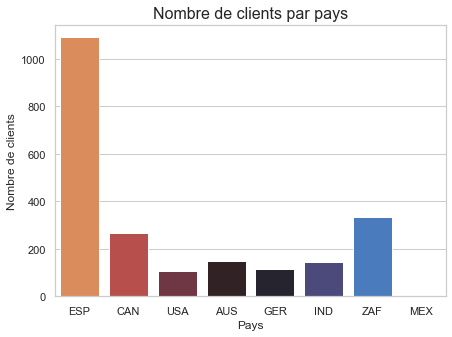

In [25]:
plt.figure(figsize = (7, 5))
sns.countplot(x = df['Country'], palette = 'icefire_r')
plt.xlabel('Pays')
plt.ylabel('Nombre de clients');
plt.title('Nombre de clients par pays', size=16)

In [26]:
df.loc[df['Country'] == 'MEX']

ID  Year_Birth  Customer_age   Education Marital_Status   Income  \
149   9323        1949            73      Master       Together  49912.0   
293   5080        1993            29  Graduation         Single  70515.0   
1436  2920        1975            47         PhD         Single  52614.0   

      DependentHome Dt_Customer  Customer_duration_days  Customer_Age_Enr  \
149               1  2012-09-07                    3478                63   
293               0  2013-10-21                    3069                20   
1436              1  2012-12-01                    3393                37   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
149         5       520          8              223               32   
293        12       420          0              452              182   
1436       63       789          0              142               12   

      MntSweetProducts  MntGoldProds  MntTotal  NumDealsPurchases  \
149                 49            42       874                  4   
293                 64           140      1258                  1   
1436                 9            38       990                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  TotalPurchases  \
149                10                    5                  7              22   
293                 6                    6                  4              16   
1436                2                    4                  8              14   

      NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
149                   8             0             0             1   
293                   2             0             0             0   
1436                  8             0             0             0   

      AcceptedCmp4  AcceptedCmp5  TotalCampaignsAcc  Response  Complain  \
149              0             0                  2         1         0   
293              0             0                  1         1         0   
1436             0             0                  0         0         0   

     Country  
149      MEX  
293      MEX  
1436     MEX

Note : Pour la suite de l'analyse, il faudra garder à l'esprit que le Mexique n'a que 3 clients.

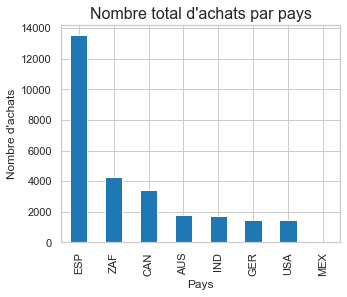

In [27]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Nombre total d\'achats par pays', size=16)
plt.xlabel('Pays')
plt.ylabel('Nombre d\'achats');

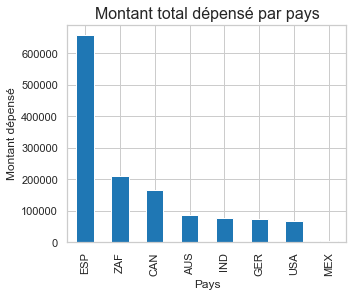

In [28]:
plt.figure(figsize=(5,4))
df.groupby('Country')['MntTotal'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Montant total dépensé par pays', size=16)
plt.xlabel('Pays')
plt.ylabel('Montant dépensé');

Observation : Que l'on regarde le nombre d'achat ou le montant total dépensé, les plus gros clients sont en Espagne.

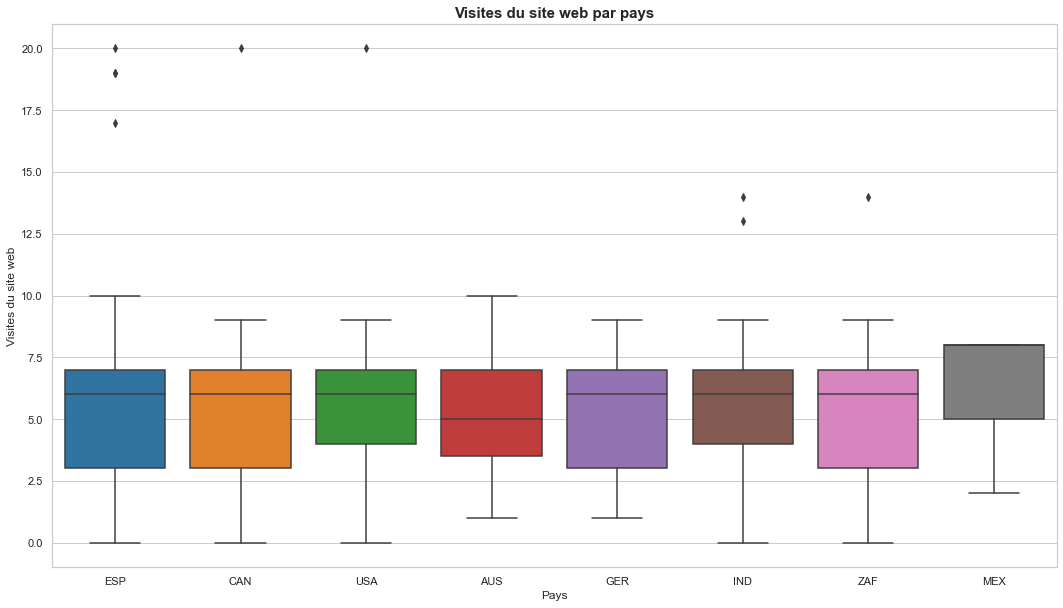

In [29]:
# Visites web par pays
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='NumWebVisitsMonth' ,data=df)
plt.xlabel('Pays')
plt.ylabel('Visites du site web')
plt.title("Visites du site web par pays", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

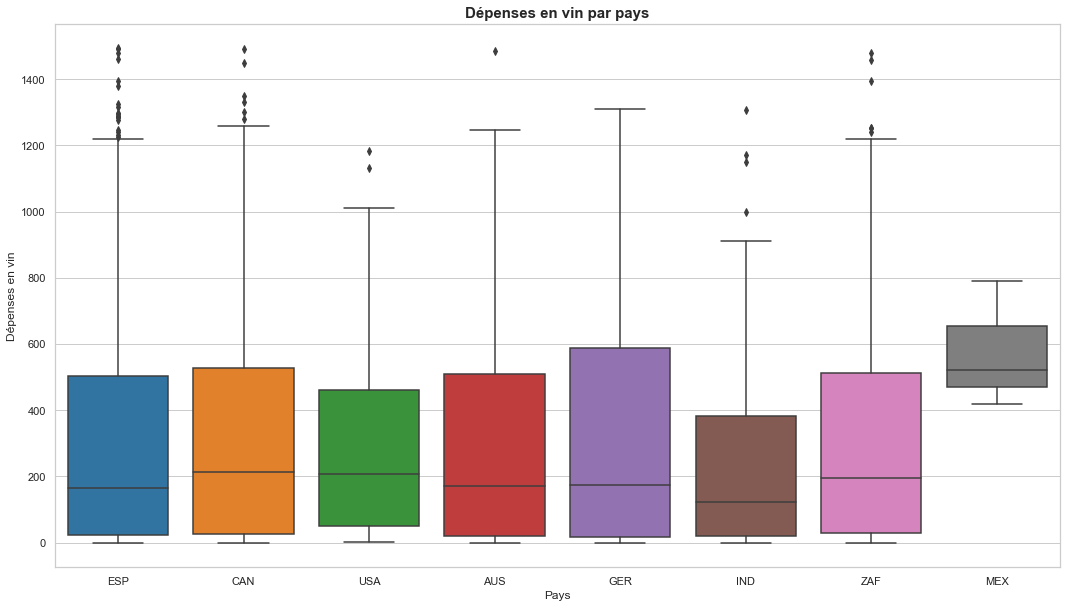

In [30]:
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='MntWines' ,data=df)
plt.xlabel('Pays')
plt.ylabel('Dépenses en vin')
plt.title("Dépenses en vin par pays", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

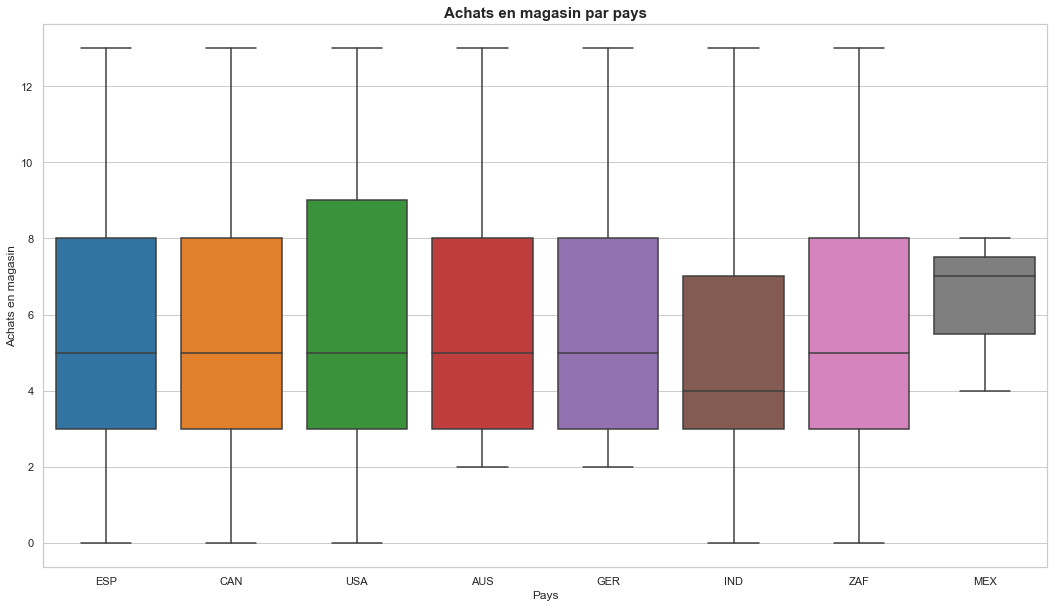

In [31]:
# Achats magasin par pays
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='NumStorePurchases' ,data=df)
plt.xlabel('Pays')
plt.ylabel('Achats en magasin')
plt.title("Achats en magasin par pays", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

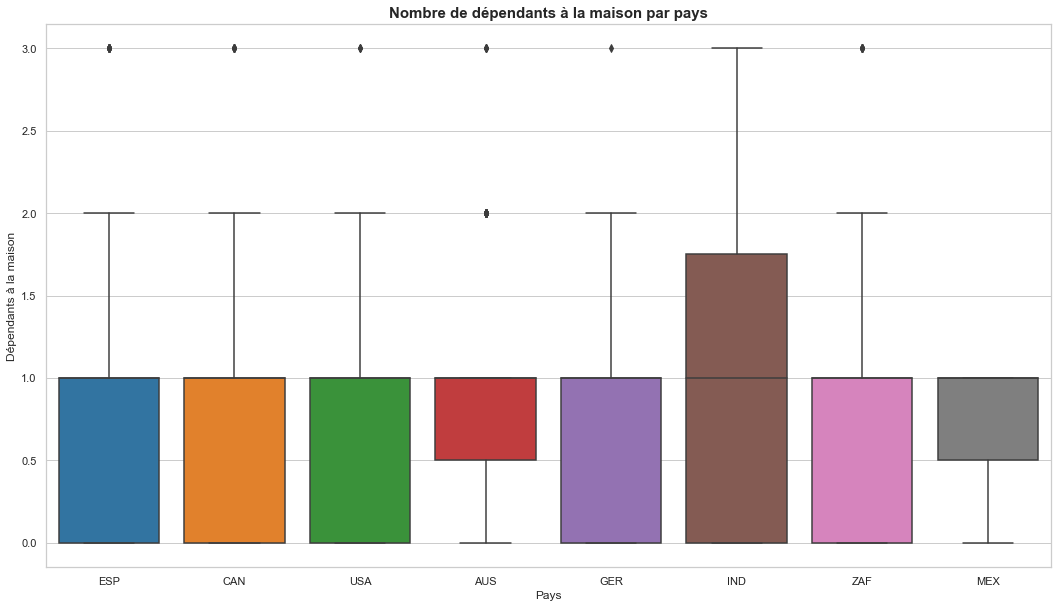

In [32]:
# Achats magasin par pays
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='DependentHome' ,data=df)
plt.xlabel('Pays')
plt.ylabel('Dépendants à la maison')
plt.title("Nombre de dépendants à la maison par pays", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

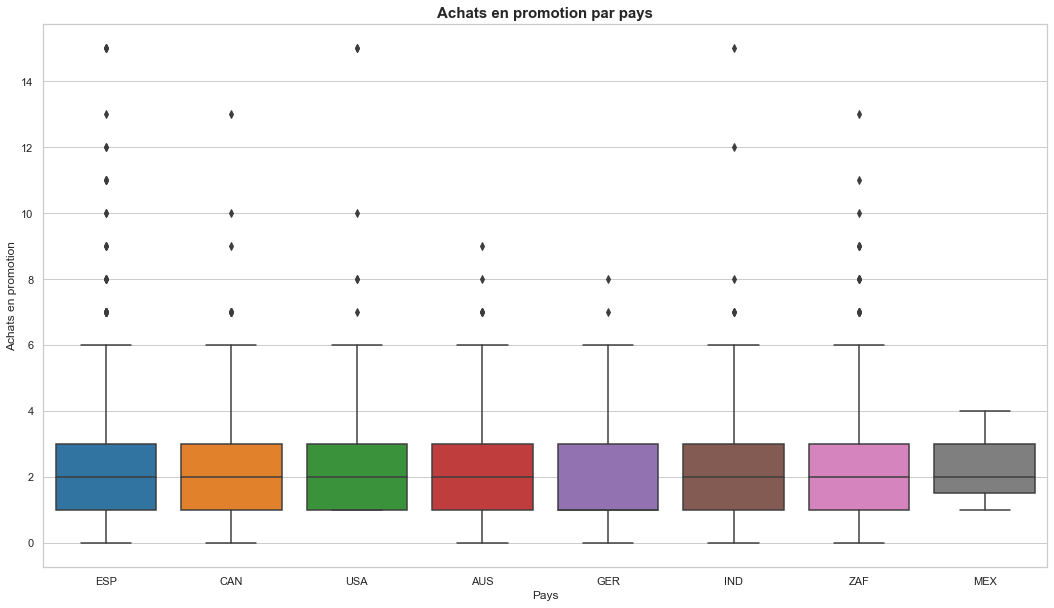

In [33]:
# Achats en promotion par pays
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='NumDealsPurchases' ,data=df)
plt.xlabel('Pays')
plt.ylabel('Achats en promotion')
plt.title("Achats en promotion par pays", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

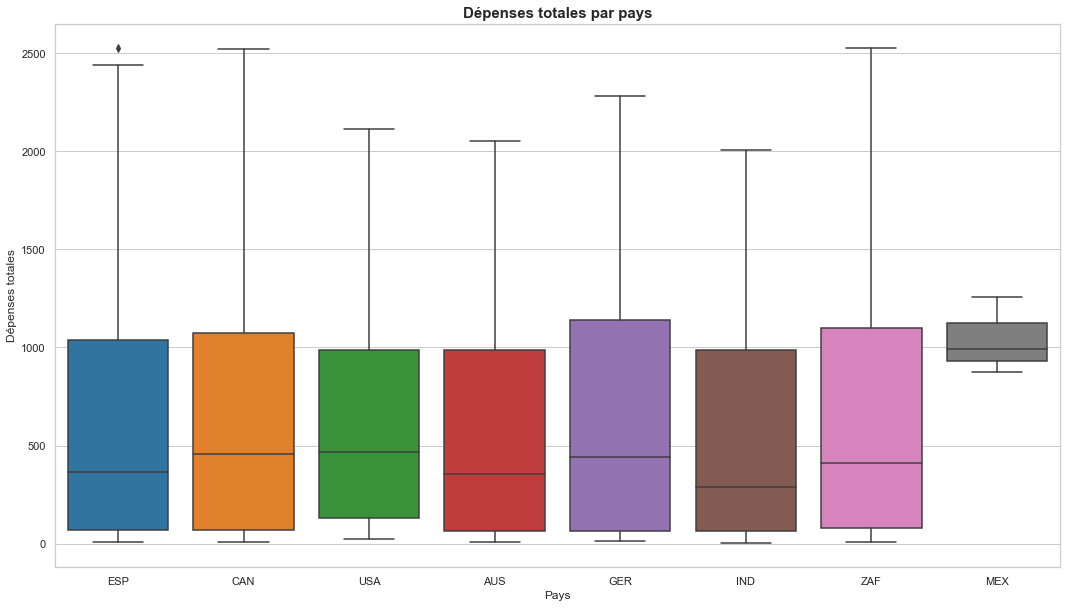

In [34]:
# Achats magasin par pays
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='MntTotal' ,data=df)
plt.xlabel('Pays')
plt.ylabel('Dépenses totales')
plt.title("Dépenses totales par pays", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

Observations : Le profil comportemental ne semble pas différer entre les pays.

### Année de naissance et âge

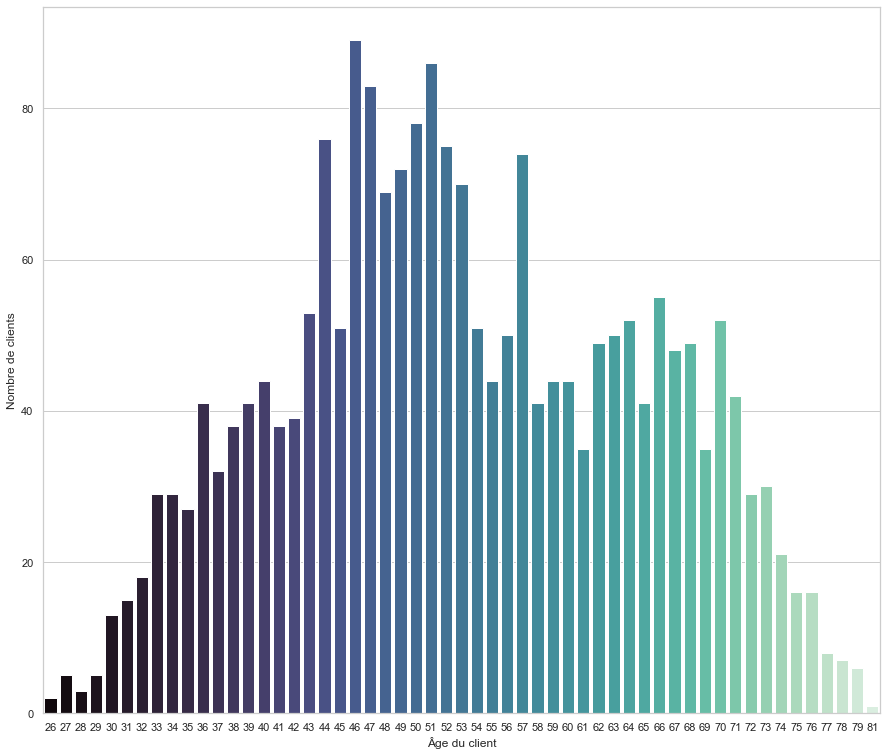

In [35]:
# Âge des clients
plt.figure(figsize = (15, 13))
sns.countplot(x = df['Customer_age'], palette = 'mako')
plt.ylabel('Nombre de clients')
plt.xlabel('Âge du client');

Observation : La plupart des clients ont entre 40 et 70 ans.
Note : les données sont de 2014 et l'âge est calculé par rapport à 2022 (voire plus bas pour l'âge au moment de l'inscription).

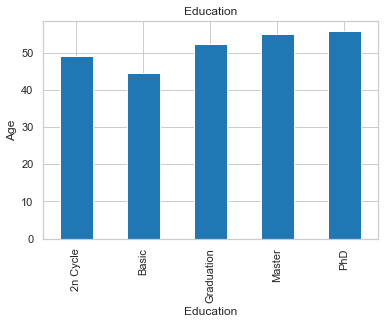

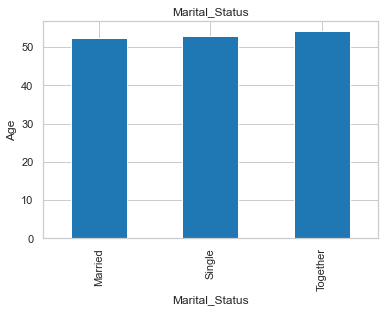

In [36]:
obj = ['Education','Marital_Status']
for i in obj:
    data=df.copy()
    data.groupby(i)['Customer_age'].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Age')
    plt.title(i)
    plt.show()

Observation : L'âge ne semble pas être corrélé à l'éducation et au statut marital.

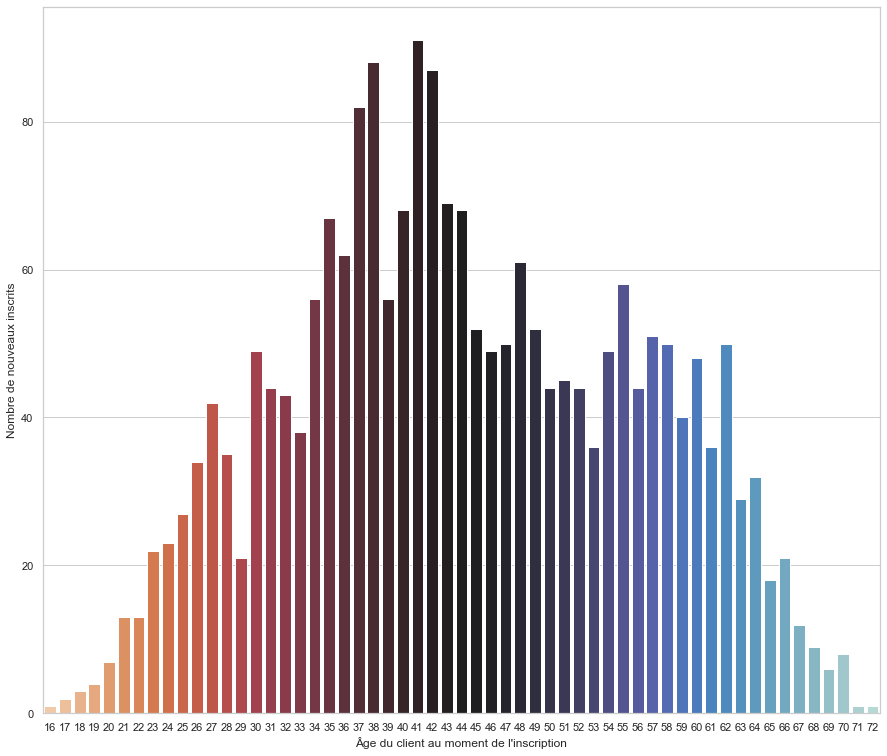

In [37]:
# Âge au moment de l'inscription
plt.figure(figsize = (15, 13))
sns.countplot(x = df['Customer_Age_Enr'], palette = 'icefire_r')
plt.ylabel('Nombre de nouveaux inscrits')
plt.xlabel('Âge du client au moment de l\'inscription');

Observation : Une majorité de clients semblent s'être inscrits entre 35 et 50 ans.

### Inscriptions par mois et par an

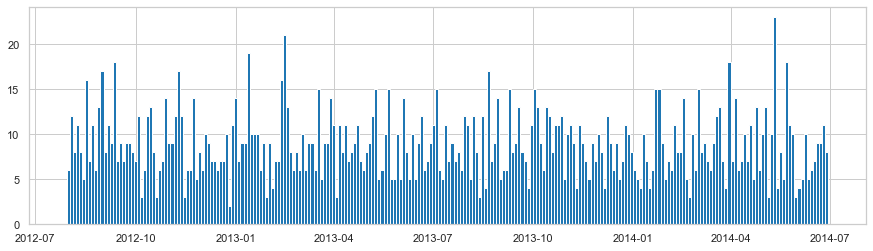

In [38]:
fig, axes = plt.subplots(figsize=(15,4))
plt.hist(pd.to_datetime(df['Dt_Customer']), bins=250);

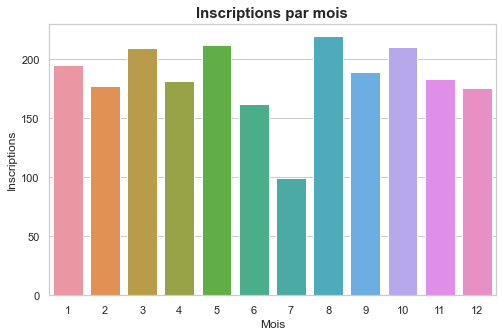

In [39]:
plt.figure(figsize = (8, 5))
sns.countplot(x = df['Dt_Customer'].dt.month)
plt.xlabel('Mois')
plt.ylabel('Inscriptions')
plt.title("Inscriptions par mois", fontdict={'fontweight':'bold','fontsize':15});

Observations : Les nouvelles inscriptions sont relativement égales toute l'année, mais baissent en juillet.
Hypothèse : Juillet est le mois des départs en vacances, les clients ont moins de courses à faire. En Août, en prévision de la rentrée, les inscriptions reprennent.

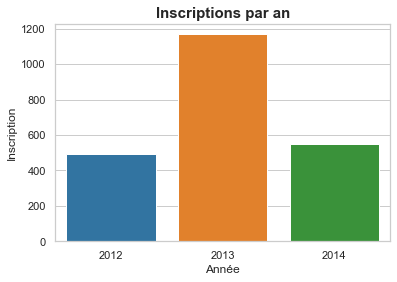

In [40]:
sns.countplot(x = df['Dt_Customer'].dt.year)
plt.xlabel('Année')
plt.ylabel('Inscription')
plt.title("Inscriptions par an", fontdict={'fontweight':'bold','fontsize':15});

Observation : Il y a eu deux fois plus d'inscriptions en 2013 qu'en 2012 ou 2014.
Hypothèse : L'acquisition de nouveaux clients a ralenti en 2014 car la stratégie de growth hacking est à revoir.
Action : Evaluer avec l'équipe growth hacking quels sont les problèmes et les besoins.

### Revenu

C:\Users\maxim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


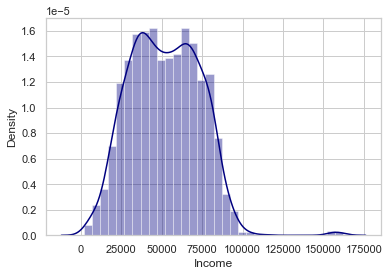

In [41]:
sns.distplot(df['Income'], color = 'navy');

### Education

''

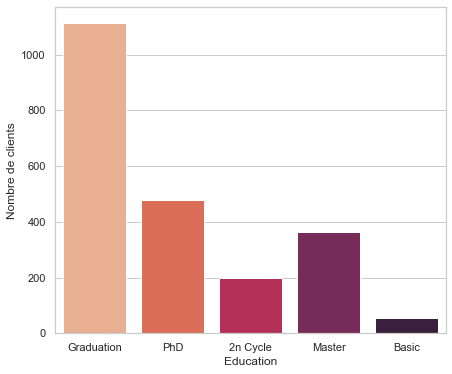

In [42]:
plt.figure(figsize = (7, 6))
sns.countplot(x = df['Education'], palette = 'rocket_r')
plt.xlabel('Education')
plt.ylabel('Nombre de clients')
;

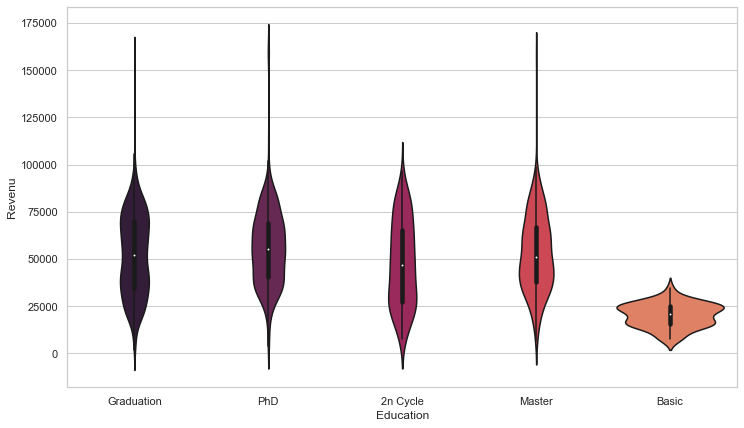

In [43]:
sns.set_palette('rocket')
plt.figure(figsize = (12, 7))
sns.violinplot(y = df['Income'], x = df['Education']);
plt.xlabel('Education')
plt.ylabel('Revenu');

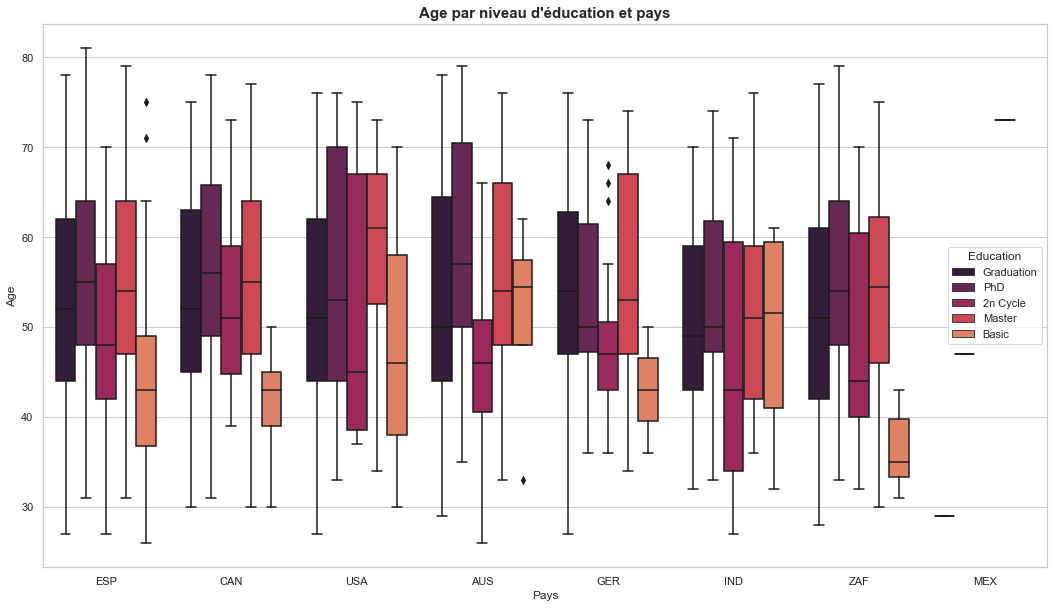

In [44]:
# Education vs age par pays
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='Customer_age', hue='Education',data=df)
plt.xlabel('Pays')
plt.ylabel('Age')
plt.title("Age par niveau d'éducation et pays", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

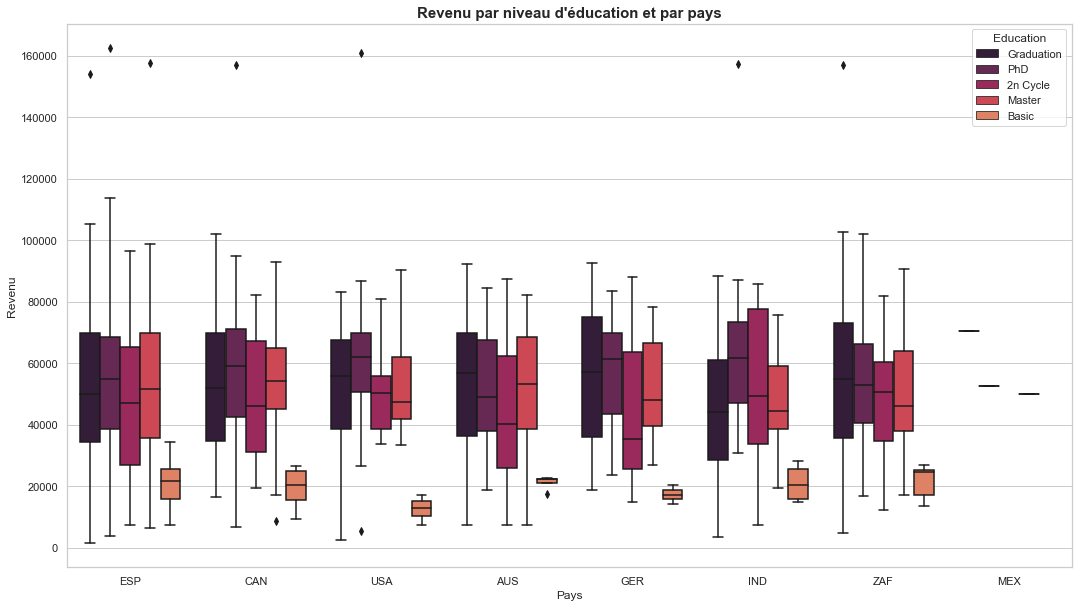

In [45]:
# Education vs revenu par pays
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='Income', hue='Education',data=df)
plt.xlabel('Pays')
plt.ylabel('Revenu')
plt.title("Revenu par niveau d'éducation et par pays", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

- Une grande majorité a une éducation "Graduation" (bac+4 en France).<br/>
- Il y a davantage de PhD (doctorat) que de Master (bac+5), <a href="https://www.census.gov/library/stories/2019/02/number-of-people-with-masters-and-phd-degrees-double-since-2000.html">contrairement à la représentation dans la population totale aux US.</a> <br/>
- 2nd Cycle Education (lycée) <br/>
- Basic (primaire et collège) <br/>

Observation : les clients sont éduqués, voire très éduqués si l'on prend en compte le nombre de PhD par rapport à la population réelle. Les différences de salaires ne sont pas très fortes entre les différentes éducations, à part pour les 'Basic'. Les PhD ont les revenus les plus importants.

### Statut marital

In [46]:
df['Marital_Status'].value_counts()

Married     857
Single      783
Together    571
Name: Marital_Status, dtype: int64

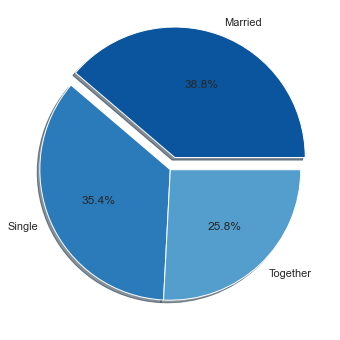

In [47]:
m = df['Marital_Status'].value_counts().to_frame('Count')

sns.set_palette('Blues_r')
plt.figure(figsize = (6, 6))
plt.pie(m['Count'], labels = m.index, explode = (0.1, 0, 0,), shadow = True, autopct = '%1.1f%%')
plt.show()

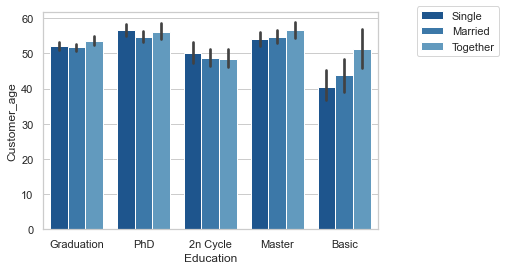

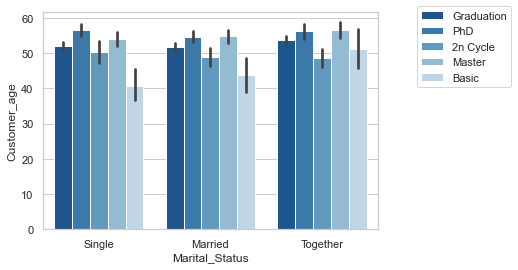

In [48]:
for i in range(len(obj)):
    for j in range(2):
        x = obj[i]
        if obj[j] != x:
            sns.barplot(x= x,y='Customer_age',hue=obj[j],data=df)
            plt.legend(bbox_to_anchor=(1.1, 1.05))
            plt.show()

Observations : 65% des clients sont mariés ou en union libre ('Together'), le reste des clients est célibataire. Les 'Basic' sont davantage célibataires que les autres.

### Comparaison des canaux d'achat (magasin vs catalogue vs web)

In [49]:
achats_canal = pd.DataFrame(df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), 
                           columns=['Total']).reset_index()
achats_canal

index  Total
0      NumWebPurchases   9040
1  NumCatalogPurchases   5910
2    NumStorePurchases  12840

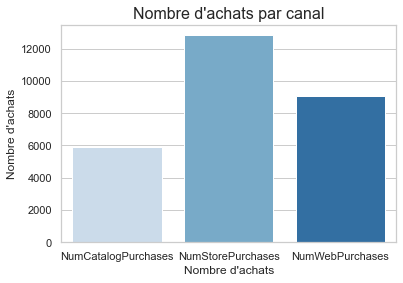

In [50]:
sns.barplot(x='index', y='Total', data=achats_canal.sort_values('index'), palette='Blues')
plt.xlabel('Nombre d\'achats')
plt.ylabel('Nombre d\'achats')
plt.title('Nombre d\'achats par canal', size=16);

Les ventes se font principalement en magasin et sur le web.

In [51]:
print("Nombre total de visites sur le site web le mois dernier : {}".format(df['NumWebVisitsMonth'].sum()))

Nombre total de visites sur le site web le mois dernier : 11766


### Comparaison types de produits achetés

In [52]:
type_achat = pd.DataFrame(df[['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']].sum(), 
                           columns=['Total']).reset_index()
type_achat

index   Total
0          MntWines  675152
1         MntFruits   58241
2   MntMeatProducts  369463
3   MntFishProducts   83279
4  MntSweetProducts   59827
5      MntGoldProds   97158

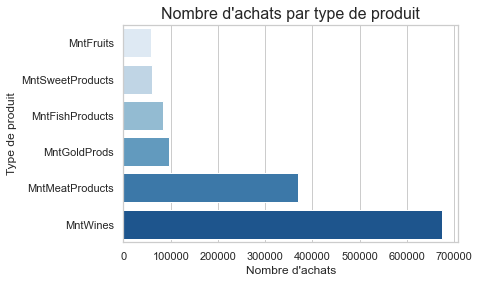

In [53]:
sns.barplot(x='Total', y='index', data=type_achat.sort_values('Total'), palette='Blues')
plt.xlabel('Nombre d\'achats')
plt.ylabel('Type de produit')
plt.title('Nombre d\'achats par type de produit', size=16);

In [54]:
type_achat2 = type_achat.transpose(copy=True).reset_index()
type_achat2.columns.name = None
type_achat2 = type_achat2.drop('index', axis=1)
type_achat2.columns = type_achat2.iloc[0]
type_achat2 = type_achat2.drop([0])
type_achat2

0 MntWines MntFruits MntMeatProducts MntFishProducts MntSweetProducts  \
1   675152     58241          369463           83279            59827   

0 MntGoldProds  
1        97158

In [55]:
Total_alim = type_achat2['MntWines'] + type_achat2['MntFruits'] + type_achat2['MntMeatProducts'] + type_achat2['MntFishProducts'] + type_achat2['MntSweetProducts']
Total_achats = type_achat2['MntWines'] + type_achat2['MntFruits'] + type_achat2['MntMeatProducts'] + type_achat2['MntFishProducts'] + type_achat2['MntSweetProducts'] + type_achat2['MntGoldProds']
total = Total_alim + Total_achats

print ("\nLe nombre d'achats de produits alimentaires est de", Total_alim.to_string(index=False))
print ("\nLe nombre d'achats de produits à base d'or est de", Total_achats.to_string(index=False))
print ("\nLe nombre total d'achats est de", total.to_string(index=False))


Le nombre d'achats de produits alimentaires est de 1245962

Le nombre d'achats de produits à base d'or est de 1343120

Le nombre total d'achats est de 2589082


Observations : 
 - Les vins représentent la majorité des ventes
 - Principalement de l'alimentaire, mais les produits à base d'or sont également importants (et probablement plus chers mais je ne dispose pas des prix pour déterminer leur part dans le CA)

### Promotions vs reste des achats

Je considère que les promotions dans 'NumDealsPurchases' sont déjà des achats inclus dans 'TotalPurchases'.

In [56]:
deals_tot = df[['NumDealsPurchases', 'TotalPurchases']].agg([sum])
deals_tot

NumDealsPurchases  TotalPurchases
sum               5141           27790

In [57]:
deals_tot['DealsRate'] = deals_tot.NumDealsPurchases * 100 / deals_tot.TotalPurchases
deals_tot

NumDealsPurchases  TotalPurchases  DealsRate
sum               5141           27790   18.49946

Observations : 18,5 % des achats sont des promotions.

### Recency (nbre de jours depuis le dernier achat)

In [58]:
df['Recency'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

C:\Users\maxim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


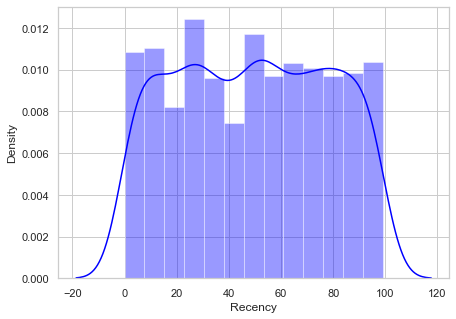

In [59]:
plt.figure(figsize = (7, 5))
sns.distplot(df['Recency'], color = 'blue');

In [60]:
df['Recency'].mean()

48.998190863862504

Observations :
 - Le nombre de jours depuis le dernier achat s'étend de 0 à 100 jours.
 - En moyenne, les clients ont réalisé leur dernier achat il y a 49 jours.

### Réclamations
#### Dataset 'Complain'

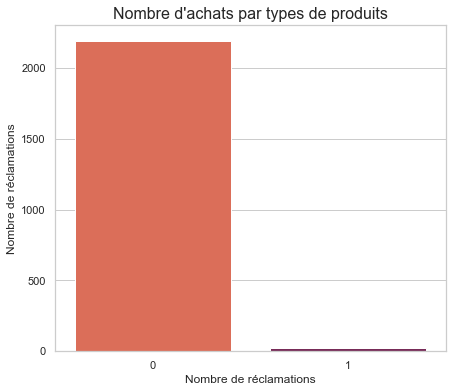

In [61]:
plt.figure(figsize = (7, 6))
sns.countplot(x = df['Complain'], palette = 'rocket_r')
plt.xlabel('Nombre de réclamations')
plt.ylabel('Nombre de réclamations')
plt.title('Nombre d\'achats par types de produits', size=16);

In [62]:
#Je créé un dataset réunissant tous les clients s'étant plaint ('Complain')
complain = df.loc[df['Complain'] == 1]
complain

ID  Year_Birth  Customer_age   Education Marital_Status   Income  \
206   10995        1988            34    2n Cycle        Married  15716.0   
297   10401        1976            46    2n Cycle       Together  26326.0   
355    5726        1983            39      Master         Single  31788.0   
555    9483        1959            63  Graduation       Together  57957.0   
662   10971        1977            45  Graduation         Single  37774.0   
728     255        1951            71  Graduation         Single  22263.0   
775     359        1950            72  Graduation       Together  48070.0   
943    3710        1984            38         PhD         Single  39684.0   
1000   6201        1978            44  Graduation         Single  38643.0   
1087   7966        1959            63  Graduation         Single  80982.0   
1103   3120        1981            41  Graduation       Together  38547.0   
1298   4427        1995            27    2n Cycle         Single  83257.0   
1336   7192        1955            67  Graduation       Together  65748.0   
1475   6142        1943            79      Master        Married  65073.0   
1506   9500        1959            63  Graduation        Married  58113.0   
1744  10637        1964            58  Graduation        Married  40800.0   
1866   6742        1979            43  Graduation        Married  17688.0   
2081   6730        1954            68  Graduation        Married  38998.0   
2082   9916        1954            68  Graduation        Married  38998.0   
2091   2875        1978            44  Graduation        Married  67023.0   

      DependentHome Dt_Customer  Customer_duration_days  Customer_Age_Enr  \
206               1  2012-11-12                    3412                24   
297               0  2013-09-04                    3116                37   
355               1  2014-03-20                    2919                31   
555               1  2013-08-19                    3132                54   
662               2  2012-09-03                    3482                35   
728               2  2014-03-30                    2909                63   
775               1  2013-01-13                    3350                63   
943               1  2012-10-12                    3443                28   
1000              2  2013-11-29                    3030                35   
1087              2  2013-01-08                    3355                54   
1103              1  2013-08-28                    3123                32   
1298              0  2012-09-18                    3467                17   
1336              1  2013-04-15                    3258                58   
1475              0  2013-08-20                    3131                70   
1506              1  2013-01-25                    3338                54   
1744              3  2013-01-01                    3362                49   
1866              1  2013-01-13                    3350                34   
2081              2  2012-11-03                    3421                58   
2082              2  2012-11-03                    3421                58   
2091              0  2014-03-04                    2935                36   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
206         8        16          5               30                8   
297        12         1          0                5                0   
355        15        16          7               23                0   
555        24       290         59              177               77   
662        28       173          8              107                7   
728        31        17          0                2                0   
775        33       373         14               83                6   
943        41        19          0               35                6   
1000       45        22          2               14                0   
1087       48       505        137              401  

In [63]:
complain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 206 to 2091
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      20 non-null     int64         
 1   Year_Birth              20 non-null     int64         
 2   Customer_age            20 non-null     int64         
 3   Education               20 non-null     object        
 4   Marital_Status          20 non-null     object        
 5   Income                  20 non-null     float64       
 6   DependentHome           20 non-null     int64         
 7   Dt_Customer             20 non-null     datetime64[ns]
 8   Customer_duration_days  20 non-null     int64         
 9   Customer_Age_Enr        20 non-null     int64         
 10  Recency                 20 non-null     int64         
 11  MntWines                20 non-null     int64         
 12  MntFruits               20 non-null     int64   

In [64]:
demo_complain=pd.DataFrame(round(complain.mean(),1),columns=['Average'])
demo_complain = demo_complain.rename(columns={"Average": "Average complainer"})

<ipython-input-64-05a97c328963>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  demo_complain=pd.DataFrame(round(complain.mean(),1),columns=['Average'])


#### Dataset 'never complained'

In [65]:
never_complain = df.loc[df['Complain'] == 0]

In [66]:
never_complain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      2191 non-null   int64         
 1   Year_Birth              2191 non-null   int64         
 2   Customer_age            2191 non-null   int64         
 3   Education               2191 non-null   object        
 4   Marital_Status          2191 non-null   object        
 5   Income                  2191 non-null   float64       
 6   DependentHome           2191 non-null   int64         
 7   Dt_Customer             2191 non-null   datetime64[ns]
 8   Customer_duration_days  2191 non-null   int64         
 9   Customer_Age_Enr        2191 non-null   int64         
 10  Recency                 2191 non-null   int64         
 11  MntWines                2191 non-null   int64         
 12  MntFruits               2191 non-null   int64   

In [67]:
demo_no_complain=pd.DataFrame(round(never_complain.mean(),1),columns=['Average'])
demo_no_complain = demo_no_complain.rename(columns={"Average": "Average non-complainer"})

<ipython-input-67-42121706a836>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  demo_no_complain=pd.DataFrame(round(never_complain.mean(),1),columns=['Average'])


In [68]:
extracted_col = demo_complain["Average complainer"]
demo_both = demo_no_complain.join(extracted_col)
demo_both

Average non-complainer  Average complainer
ID                                      5574.8              6667.4
Year_Birth                              1968.9              1968.4
Customer_age                              53.1                53.6
Income                                 52016.6             45672.4
DependentHome                              0.9                 1.2
Customer_duration_days                  3171.0              3247.7
Customer_Age_Enr                          44.1                44.5
Recency                                   49.0                50.8
MntWines                                 306.5               176.7
MntFruits                                 26.4                25.1
MntMeatProducts                          167.6               117.7
MntFishProducts                           37.8                26.7
MntSweetProducts                          27.1                18.2
MntGoldProds                              44.1                27.6
MntTotal                                 609.4               392.0
NumDealsPurchases                          2.3                 2.4
NumWebPurchases                            4.1                 3.7
NumCatalogPurchases                        2.7                 2.1
NumStorePurchases                          5.8                 5.4
TotalPurchases                            12.6                11.2
NumWebVisitsMonth                          5.3                 5.8
AcceptedCmp1                               0.1                 0.0
AcceptedCmp2                               0.0                 0.0
AcceptedCmp3                               0.1                 0.1
AcceptedCmp4                               0.1                 0.0
AcceptedCmp5                               0.1                 0.0
TotalCampaignsAcc                          0.5                 0.3
Response                                   0.2                 0.2
Complain                                   0.0                 1.0

Les clients ayant déposé une réclamation ont tendance à : 
- avoir un revenu plus faible 
- beaucoup moins dépenser que les autres
- davantage visiter le site web
- acheter davantage de promotions 
- moins accepter les campagnes
- avoir plus de dépendents à la maison
- réaliser presque autant d'achats.

In [69]:
sum_comp = len(complain)
sum_no_comp = len(never_complain)
complain_rate = (sum_comp * 100 / (sum_comp + sum_no_comp)) 

print ("\nLe nombre de clients ayant déposé une réclamation est de", sum_comp)
print ("\nLe nombre de clients n'ayant jamais déposé une réclamation est de", sum_no_comp)
print ("\nLe pourcentage de clients ayant déposé une réclamation (taux de réclamation) est de", complain_rate)


Le nombre de clients ayant déposé une réclamation est de 20

Le nombre de clients n'ayant jamais déposé une réclamation est de 2191

Le pourcentage de clients ayant déposé une réclamation (taux de réclamation) est de 0.9045680687471732


### Succès des campagnes marketing

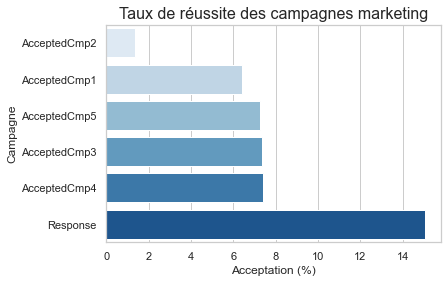

In [70]:
# Taux de réussite des campagnes (réussite = acceptation de l'offre proposée dans la campagne)
# Response = acceptation de la dernière campagne
camp_succes = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

sns.barplot(x='Percent', y='index', data=camp_succes.sort_values('Percent'), palette='Blues')
plt.xlabel('Acceptation (%)')
plt.ylabel('Campagne')
plt.title('Taux de réussite des campagnes marketing', size=16);

La 2ème campagne a moins bien fonctionné mais la dernière campagne ('Response') a été acceptée deux fois plus que les autres.

In [71]:
df

ID  Year_Birth  Customer_age   Education Marital_Status   Income  \
0      1826        1970            52  Graduation         Single  84835.0   
1         1        1961            61  Graduation         Single  57091.0   
2     10476        1958            64  Graduation        Married  67267.0   
3      1386        1967            55  Graduation       Together  32474.0   
4      5371        1989            33  Graduation         Single  21474.0   
...     ...         ...           ...         ...            ...      ...   
2235  10142        1976            46         PhD         Single  66476.0   
2236   5263        1977            45    2n Cycle        Married  31056.0   
2237     22        1976            46  Graduation         Single  46310.0   
2238    528        1978            44  Graduation        Married  65819.0   
2239   4070        1969            53         PhD        Married  94871.0   

      DependentHome Dt_Customer  Customer_duration_days  Customer_Age_Enr  \
0                 0  2014-06-16                    2831                44   
1                 0  2014-06-15                    2832                53   
2                 1  2014-05-13                    2865                56   
3                 2  2014-05-11                    2867                47   
4                 1  2014-04-08                    2900                25   
...             ...         ...                     ...               ...   
2235              1  2013-03-07                    3297                37   
2236              1  2013-01-22                    3341                36   
2237              1  2012-12-03                    3391                36   
2238              0  2012-11-29                    3395                34   
2239              2  2012-09-01                    3484                43   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0           0       189        104              379              111   
1           0       464          5               64                7   
2           0       134         11               59               15   
3           0        10          0                1                0   
4           0         6         16               24               11   
...       ...       ...        ...              ...              ...   
2235       99       372         18              126               47   
2236       99         5         10               13                3   
2237       99       185          2               88               15   
2238       99       267         38              701              149   
2239       99       169         24              553              188   

      MntSweetProducts  MntGoldProds  MntTotal  NumDealsPurchases  \
0                  189           218      1190                  1   
1                    0            37       577                  1   
2                    2            30       251                  1   
3                    0             0        11                  1   
4                    0            34        91                  2   
...                ...           ...       ...                ...   
2235                48            78       689                  2   
2236                 8            16        55                  1   
2237                 5            14       309                  2   
2238               165            63      1383                  1   
2239                 0           144      1078                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  TotalPurchases  \
0                   4                    4                  6              14   
1                   7                    3                  7              17   
2                   3                    2                  5              10   
3                   1                    0                  2               3   
4                   3                    1                  

In [72]:
df.to_csv('data_marketing_tableau.csv')

### Matrice de corrélations

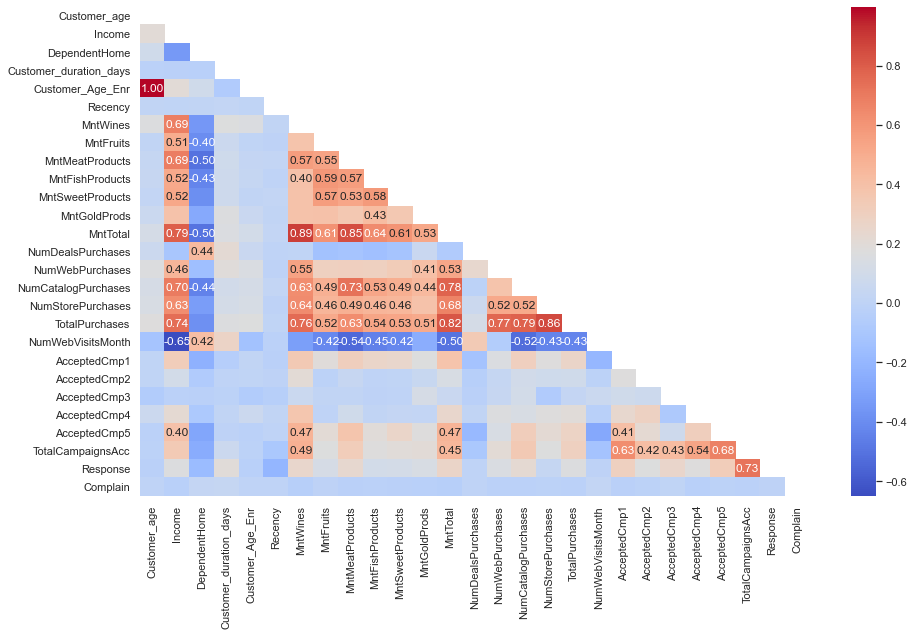

In [73]:
lr_df = df.copy()
lr_df = lr_df.drop(['ID','Year_Birth','Education','Marital_Status','Dt_Customer'], axis=1)

plt.figure(figsize=(15,9))                       
                       
corr = lr_df.corr()

matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', mask=matrix)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.4:
        t.set_text(t.get_text())
    else:
        t.set_text("")

plt.show()

Si r est :
 - '>' à 0,7 = forte corrélation
 - entre 0,5 et 0,7 = corrélation modérée
 - < 0,4 = corrélation faible ou nulle

Observations :
- Revenu : plus le revenu est important, plus les dépenses (surtout en vin et viande) et le nombre d'achats ('...Purchases') sont importants, sauf pour les produits or
- Revenu : forte corrélation positive entre revenu et achat dans le catalogue
- Revenu : forte corrélation négative entre revenu et visites du site web
- Dépendants : plus le clients a d'enfants à la maison ('DependentHome'), moins il dépense, réalise des achats (dans toutes les catégories), répond à des campagnes et a un fort revenu ; mais plus il visite le site web et achète des promotions ('NumDealsPurchases') 
- Produits : corrélation positive entre différentes catégories de produits
- Achats sur le web : corrélation positive entre achats sur le web et revenu, vin et or.
- Achats catalogue : corrélation positive entre achats sur catalogue et revenu
- Achats catalogue : corrélation négative entre achats catalogue et dépendants à la maison
- Acceptation des campagnes marketing : le nombre de campagnes acceptées sont corrélées entre elles ; mais le nombre total de campagne acceptées ('TotalCampaignsAcc') est faiblement négativement corrélé au nombre de dépendants à la maison, et faiblement positivement corrélé aux revenus
- Acceptation campagne 5 : corrélation positive avec les achats en vin, revenus, et montant total dépensé, ainsi que la campagne 1
- Total acceptation campagnes : légèrement positviement corrélé aux achats en vins 
- Visites du site web : le nombre de visites sur le site web n'est pas corrélé au nombre de ventes sur le site web, mais il l'est positivement au nombre d'achats de promotion

Hypothèses :
- Les personnes achetant sur le web sont moins susceptible de d'acheter dans toutes les catégories de produits que les achats magasin et catalogue.
- Les personnes achetant sur le web sont plus susceptible d'acheter du vin et de l'or que des produits d'autres catégories.
- Les personnes achetant en magasin sont susceptible d'acheter des produits de toute catégorie, sauf d'or.
- Les campagnes 1 et 5 ont ciblé les mêmes clients.
- La campagne 5 a ciblé des clients qui ont des hauts revenus et aiment le vin.

#### Revenu vs Montant total dépensé

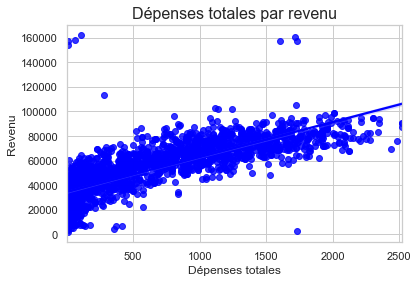

In [74]:
sns.regplot(x = df['MntTotal'], y = df['Income'], color = 'blue')
plt.xlabel('Dépenses totales')
plt.ylabel('Revenu')
plt.title('Dépenses totales par revenu', size=16);

Corrélation positive confirmée : plus le client a des revenus important, plus il a dépensé.

#### Revenu vs Vin

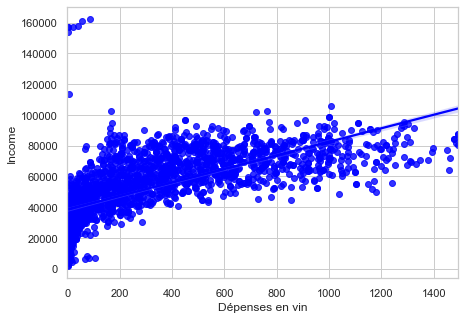

In [75]:
plt.figure(figsize = (7, 5))
sns.regplot(x = df['MntWines'], y = df['Income'], color = 'blue')
plt.xlabel('Dépenses en vin');

#### Revenu vs Or

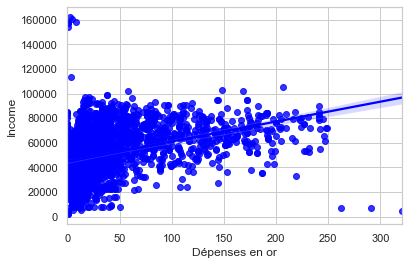

In [76]:
sns.regplot(x = df['MntGoldProds'], y = df['Income'], color = 'blue')
plt.xlabel('Dépenses en or');

Confirmation de la corrélation positive, plus le client a un haut revenu, plus il va dépenser en or, mais moins il va le faire.

#### Dépendants à la maison vs dépenses

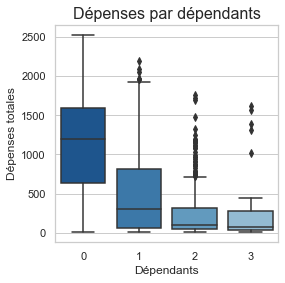

In [77]:
plt.figure(figsize=(4,4))
sns.boxplot(x='DependentHome', y='MntTotal', data=df)
plt.xlabel('Dépendants')
plt.ylabel('Dépenses totales')
plt.title('Dépenses par dépendants', size=16);

Cela confirme la corrélation négative, plus il a d'enfants/dépendants à la maison, moins le client va dépenser.

#### Dépendants à la maison vs promotions achetées

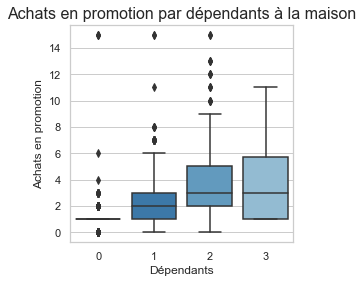

In [78]:
plt.figure(figsize=(4,4))
sns.boxplot(x='DependentHome', y='NumDealsPurchases', data=df)
plt.xlabel('Dépendants')
plt.ylabel('Achats en promotion')
plt.title('Achats en promotion par dépendants à la maison', size=16);

Confirmation de la corrélation positive entre le nombre d'enfants et le nombre de promotions achetées.

#### Visites web vs achats sur le web

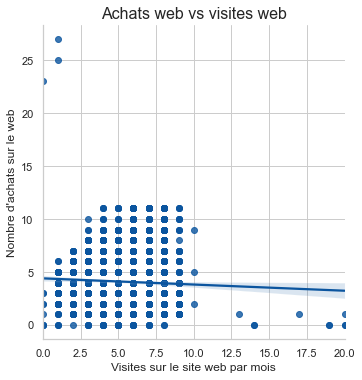

In [79]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df);
plt.xlabel('Visites sur le site web par mois')
plt.ylabel('Nombre d\'achats sur le web')
plt.title('Achats web vs visites web', size=16);

Légère corrélations négative : le nombre de visites sur le site web n'a pas vraiment d'influence sur le nombre d'achats sur le site web.

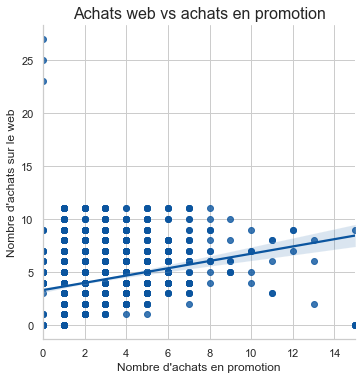

In [80]:
sns.lmplot(x='NumDealsPurchases', y='NumWebPurchases', data=df)
plt.xlabel('Nombre d\'achats en promotion')
plt.ylabel('Nombre d\'achats sur le web')
plt.title('Achats web vs achats en promotion', size=16);

Corrélation positive entre achat sur le web et achat de promotions (les promotions sont sur le web)

#### Visites web vs achats de promotions

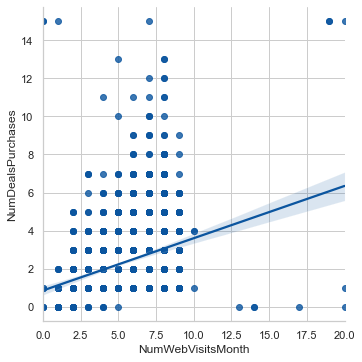

In [81]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df);

Corrélation positive confirmée : plus le client visite le site web, plus il achète de promotions. <br>
Donc, augmenter le nombre de promotions impacte le traffic sur le site web, ou les promotions sont uniquement sur le web.

#### Revenus vs acceptation de campagne marketing

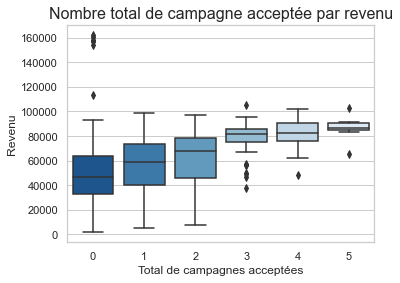

In [82]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=df[df['Income']<200000])
plt.xlabel('Total de campagnes acceptées')
plt.ylabel('Revenu')
plt.title('Nombre total de campagne acceptée par revenu', size=16);

Plus il a des hauts revenus, moins le client va accepter de campagnes.

#### Nombre de dépendants vs acceptation de campagne marketing

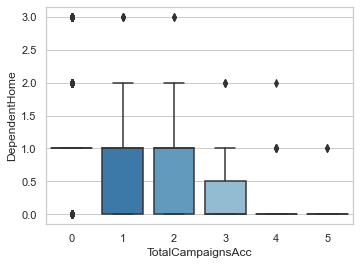

In [83]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='DependentHome', data=df);

Plus il a de dépendants à la maison, moins il accepte de campagnes.

#### Pays vs acceptation de campagne

In [84]:
categorical_df = lr_df.select_dtypes(exclude='number')

dummy_df = pd.DataFrame()
for col in categorical_df.columns:
    dummy = pd.get_dummies(categorical_df[col], prefix=col)
    dummy_df = pd.concat([dummy_df, dummy], axis=1)
    
lr_df = pd.concat([lr_df, dummy_df], axis=1)
lr_df.drop(categorical_df.columns, axis=1, inplace=True)

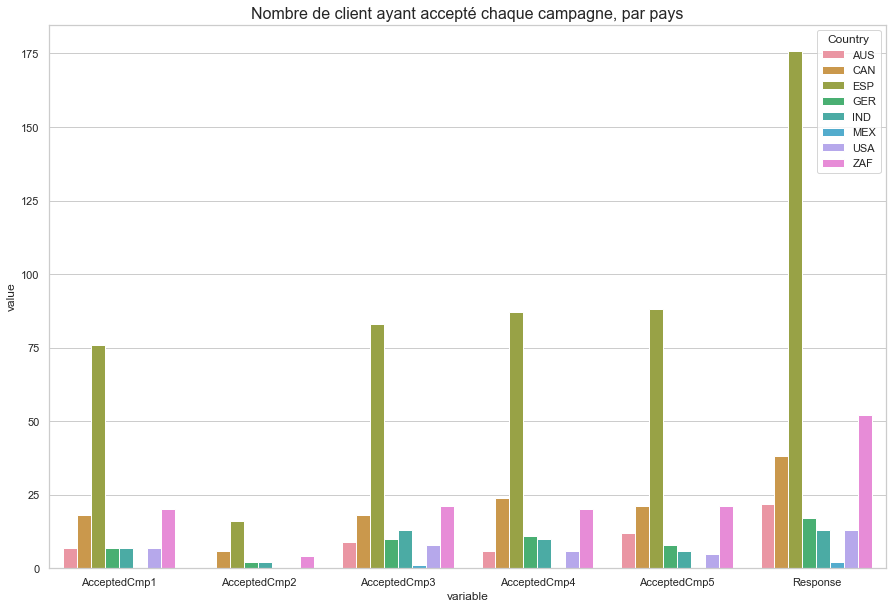

In [85]:
cmp_cols = ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
country_cols = ['Country_AUS', 'Country_CA','Country_GER', 'Country_IND', 
                'Country_ME', 'Country_SA', 'Country_SP', 'Country_US']

cmp_melt_df = df.melt(id_vars='ID', value_vars=cmp_cols)
final_melt_df = cmp_melt_df.merge(right=df[['ID','Country']], how='inner', left_on='ID', right_on='ID')
final_df = final_melt_df.groupby(['variable','Country']).sum().reset_index()
####
plt.figure(figsize=(15,10))
sns.barplot(x='variable', y='value', hue='Country', data=final_df)
plt.title("Nombre de client ayant accepté chaque campagne, par pays", size=16)

plt.show()

In [86]:
df_cam = df[['Country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='Country', var_name='Campaign', value_name='Accepted (%)')
df_cam = pd.DataFrame(df_cam.groupby(['Country', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)
df_cam

Country      Campaign  Accepted (%)
0      AUS  AcceptedCmp1      4.761905
1      AUS  AcceptedCmp2      0.000000
2      AUS  AcceptedCmp3      6.122449
3      AUS  AcceptedCmp4      4.081633
4      AUS  AcceptedCmp5      8.163265
5      AUS      Response     14.965986
6      CAN  AcceptedCmp1      6.766917
7      CAN  AcceptedCmp2      2.255639
8      CAN  AcceptedCmp3      6.766917
9      CAN  AcceptedCmp4      9.022556
10     CAN  AcceptedCmp5      7.894737
11     CAN      Response     14.285714
12     ESP  AcceptedCmp1      6.966086
13     ESP  AcceptedCmp2      1.466544
14     ESP  AcceptedCmp3      7.607699
15     ESP  AcceptedCmp4      7.974335
16     ESP  AcceptedCmp5      8.065995
17     ESP      Response     16.131989
18     GER  AcceptedCmp1      6.034483
19     GER  AcceptedCmp2      1.724138
20     GER  AcceptedCmp3      8.620690
21     GER  AcceptedCmp4      9.482759
22     GER  AcceptedCmp5      6.896552
23     GER      Response     14.655172
24     IND  AcceptedCmp1      4.794521
25     IND  AcceptedCmp2      1.369863
26     IND  AcceptedCmp3      8.904110
27     IND  AcceptedCmp4      6.849315
28     IND  AcceptedCmp5      4.109589
29     IND      Response      8.904110
30     MEX  AcceptedCmp1      0.000000
31     MEX  AcceptedCmp2      0.000000
32     MEX  AcceptedCmp3     33.333333
33     MEX  AcceptedCmp4      0.000000
34     MEX  AcceptedCmp5      0.000000
35     MEX      Response     66.666667
36     USA  AcceptedCmp1      6.542056
37     USA  AcceptedCmp2      0.000000
38     USA  AcceptedCmp3      7.476636
39     USA  AcceptedCmp4      5.607477
40     USA  AcceptedCmp5      4.672897
41     USA      Response     12.149533
42     ZAF  AcceptedCmp1      5.970149
43     ZAF  AcceptedCmp2      1.194030
44     ZAF  AcceptedCmp3      6.268657
45     ZAF  AcceptedCmp4      5.970149
46     ZAF  AcceptedCmp5      6.268657
47     ZAF      Response     15.522388

In [87]:
import plotly.express as px

fig = px.choropleth(df_cam, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=2,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, width=700,
                    locations='Country', projection='natural earth', title='Taux de réussite des campagnes par pays'
                   )
fig.show()

Observations :
 - Les taux d'acceptation des campagnes sont relativement similaires entre pays (sauf Mexique qui n'a que 3 clients).
 - C'est en Espagne que la plupart des personnes qui acceptent les campagnes se trouvent (mais là aussi là où il y a le plus de clients). 
 - Puis le Canada et l'Afrique du Sud arrivent en 2ème et 3ème avec des taux très proches.
 - La campagne la plus récente (Response) est celle qui a le plus marché.
 - La campagne 2 est celle qui a le moins marché, dans tous les pays.
 - Les campagnes fonctionnent moins bien sur le marché indien.

## 3 - Segmentation RFM des clients

"La segmentation RFM consiste à segmenter les clients en fonction de leur comportement d’achat. C’est une segmentation 100% comportementale. On ne segmente pas  les clients en fonction de ce qu’ils sont (genre, sexe, ville, CSP…), ni en fonction de ce qu’ils aiment (centres d’intérêt, goûts), mais en fonction de ce qu’ils achètent. Le principe sous-jacent est simple : un client qui a acheté récemment, qui achète fréquemment et qui génère beaucoup de chiffre d’affaires commandera à nouveau, à coup quasiment sûr. Les chances de se tromper sont très faibles. La segmentation RFM repose sur ces 3 critères : Récence / Fréquence / Montant.

La segmentation RFM :

- Permet d’identifier ses meilleurs clients, ceux les plus susceptibles de réagir positivement aux sollicitations marketing.
- Est simple à mettre en oeuvre. Pas besoin de data scientists pour mettre en place une segmentation RFM, comme vous pourrez vous en rendre compte dans quelques instants.
- Permet de créer une segmentation basée sur des critères de segmentation objectifs. La segmentation RFM repose entièrement sur des critères objectifs, observables (dans l’historique de commandes) et mesurables : Récence – Fréquence – Montant.

La segmentation RFM se construit en se focalisant sur trois critères uniquement, qui sont :

- La <b>Récence</b>. Combien de temps s’est-il écoulé depuis la dernière activité du client ? En général, on s’intéresse exclusivement au dernier achat, c’est plus simple. Mais on peut aussi s’intéresser à la dernière visite sur le site web, à la dernière utilisation de l’application, etc. Pourquoi s’intéresser à la récence et en faire une des trois critères de cette segmentation phare ? Parce que dans la plupart des cas, moins cela fait longtemps qu’un client a interagi avec la marque ou acheté un produit, plus il y a de chances qu’il réagisse favorablement aux sollicitations marketing qu’on lui soumet. Conseil : Si vous débutez avec la segmentation RFM, focalisez-vous sur les achats uniquement, pas sur les autres interactions.
- La <b>Fréquence</b>. Au cours d’une période de temps donnée, combien de fois un client a-t-il acheté ou interagi avec la marque ? Les clients qui achètent le plus souvent ou qui interagissent le plus souvent avec la marque sont par définition plus engagés avec elle, donc probablement plus fidèles aussi que les autres. Conseil : pareil, si vous débutez, ne vous intéressez qu’aux achats, et pas aux autres interactions.
- Le <b>Montant</b> (en anglais « monetary »). Combien un client a-t-il dépensé d’argent au cours d’une période de temps donnée ? Les gros acheteurs doivent être traités différemment de ceux qui n’achètent presque jamais, c’est normal. Un autre critère intéressant pour la segmentation client est le panier moyen. Il se calcule en divisant le montant par la fréquence."


Source : https://www.cartelis.com/blog/segmentation-rfm-definition-calcul/

### Score RFM

In [88]:
# Calcul de la Fréquence
df_rfm = df.copy()
df_rfm['Frequency'] = df_rfm['NumStorePurchases'] + df_rfm['NumCatalogPurchases'] + df_rfm['NumWebPurchases']

# Le Montant et la Récence existent déjà
df_rfm.rename(columns = {'MntTotal':'Monetary'}, inplace = True)
rfm = df_rfm[['ID', 'Recency', 'Frequency', 'Monetary']].copy()
rfm

ID  Recency  Frequency  Monetary
0      1826        0         14      1190
1         1        0         17       577
2     10476        0         10       251
3      1386        0          3        11
4      5371        0          6        91
...     ...      ...        ...       ...
2235  10142       99         18       689
2236   5263       99          4        55
2237     22       99         12       309
2238    528       99         19      1383
2239   4070       99         17      1078

[2211 rows x 4 columns]

In [89]:
quantiles_recence = rfm.quantile(q = [0.25,0.50,0.75])
quantiles_recence

ID  Recency  Frequency  Monetary
0.25  2814.5     24.0        6.0      69.0
0.50  5454.0     49.0       12.0     397.0
0.75  8419.0     74.0       18.5    1048.0

In [90]:
# Fonction de détermination du score RFM :
def R_score(data):
    if data < quantiles_recence['Recency'][0.25]:
        return 3
    elif data < quantiles_recence['Recency'][0.75]:
        return 2
    else:
        return 1
    
def F_score(data):
    if data < quantiles_recence['Frequency'][0.25]:
        return 3
    elif data < quantiles_recence['Frequency'][0.75]:
        return 2
    else:
        return 1    
    
    
def M_score(data):
    if data < quantiles_recence['Monetary'][0.25]:
        return 3
    elif data < quantiles_recence['Monetary'][0.75]:
        return 2
    else:
        return 1     

In [91]:
rfm['R_score'] = rfm.Recency.apply(lambda x : R_score(x))
rfm['F_score'] = rfm.Frequency.apply(lambda x : F_score(x))
rfm['M_score'] = rfm.Monetary.apply(lambda x : M_score(x))
rfm['rfm_score'] = rfm.loc[:,['R_score','F_score', 'M_score']].sum(axis=1)
rfm
#Recency 3 = meilleur score ; 
#Frequency 1 = meilleur score
# Monetary 1 = meilleur score

ID  Recency  Frequency  Monetary  R_score  F_score  M_score  \
0      1826        0         14      1190        3        2        1   
1         1        0         17       577        3        2        2   
2     10476        0         10       251        3        2        2   
3      1386        0          3        11        3        3        3   
4      5371        0          6        91        3        2        2   
...     ...      ...        ...       ...      ...      ...      ...   
2235  10142       99         18       689        1        2        2   
2236   5263       99          4        55        1        3        3   
2237     22       99         12       309        1        2        2   
2238    528       99         19      1383        1        1        1   
2239   4070       99         17      1078        1        2        1   

      rfm_score  
0             6  
1             7  
2             7  
3             9  
4             7  
...         ...  
2235          5  
2236          7  
2237          5  
2238          3  
2239          4  

[2211 rows x 8 columns]

### Distribution des variables

C:\Users\maxim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\maxim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\maxim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



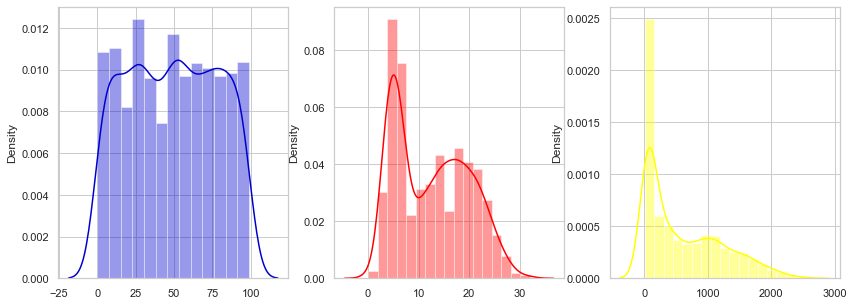

In [92]:
plt.figure(figsize = (14,5))

plt.subplot(1,3, 1)
sns.distplot(x = rfm['Recency'], kde = True, color = 'mediumblue')

plt.subplot(1,3,2)
sns.distplot(x = rfm['Frequency'], kde = True, color = 'red')

plt.subplot(1,3,3)
sns.distplot(x = rfm['Monetary'], kde = True, color = 'yellow');

In [93]:
rfm.skew()

ID           0.042138
Recency     -0.000423
Frequency    0.291625
Monetary     0.856688
R_score      0.020870
F_score      0.022999
M_score      0.002555
rfm_score    0.109975
dtype: float64

"Une donnée est dite asymétrique ('skewed') lorsque la courbe apparaît déformée ou asymétrique vers la gauche ou vers la droite, dans une distribution statistique. Dans une distribution normale, le graphique apparaît symétrique, ce qui signifie qu'il y a à peu près autant de valeurs de données sur le côté gauche de la médiane que sur le côté droit.

En cas de distribution normale, la moyenne, la médiane et le mode sont approximativement plus proches. Ces trois mesures sont toutes des mesures du centre d'une donnée. L'asymétrie des données peut être déterminée par la façon dont ces quantités sont liées les unes aux autres. Les distributions réelles sont généralement asymétriques. S'il y a trop d'asymétrie dans les données, de nombreux modèles statistiques ne fonctionnent pas à cause des valeurs aberrantes.

Une <b>transformation logarithmique</b> peut aider à adapter une distribution très asymétrique à une distribution gaussienne."

Source : https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37

Au vu des graphiques, et avec un skewness entre -0,5 et 0,5, <b>Recency</b> et <b>Frequency</b> sont normalement distribués.

Cependant, avec un skewness de 0.85, <b>Monetary</b> ne l'est pas, il faut donc le <b>passer au logarithme</b>.

### Passage au logarithme

In [94]:
rfm_log = rfm.copy()
rfm_log['Monetary'] = np.log1p(rfm_log['Monetary'])
rfm_log

ID  Recency  Frequency  Monetary  R_score  F_score  M_score  \
0      1826        0         14  7.082549        3        2        1   
1         1        0         17  6.359574        3        2        2   
2     10476        0         10  5.529429        3        2        2   
3      1386        0          3  2.484907        3        3        3   
4      5371        0          6  4.521789        3        2        2   
...     ...      ...        ...       ...      ...      ...      ...   
2235  10142       99         18  6.536692        1        2        2   
2236   5263       99          4  4.025352        1        3        3   
2237     22       99         12  5.736572        1        2        2   
2238    528       99         19  7.232733        1        1        1   
2239   4070       99         17  6.983790        1        2        1   

      rfm_score  
0             6  
1             7  
2             7  
3             9  
4             7  
...         ...  
2235          5  
2236          7  
2237          5  
2238          3  
2239          4  

[2211 rows x 8 columns]

C:\Users\maxim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



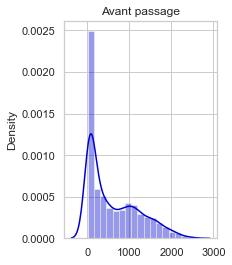

In [95]:
plt.subplot(1,2,1)
sns.distplot(x = rfm['Monetary'], kde = True, color = "mediumblue")
plt.title('Avant passage');

C:\Users\maxim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



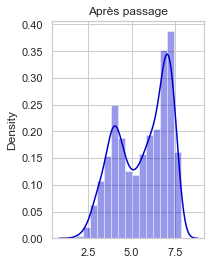

In [96]:
plt.subplot(1,2,1)
sns.distplot(x = rfm_log['Monetary'], kde = True, color = "mediumblue")
plt.title('Après passage');

Avant passage au logarithme, la distribution avait un skewness vers la droite. Après passage, la distribution semble davantage suivre une loi normale.

### Normalisation des données

In [97]:
scaler = preprocessing.MinMaxScaler()
rfm_norm = pd.DataFrame(scaler.fit_transform(rfm_log[['Recency','Frequency','Monetary']]))
rfm_norm.columns = ['Recency','Frequency','Monetary']
rfm_norm

Recency  Frequency  Monetary
0         0.0    0.43750  0.875577
1         0.0    0.53125  0.755931
2         0.0    0.31250  0.618550
3         0.0    0.09375  0.114709
4         0.0    0.18750  0.451795
...       ...        ...       ...
2206      1.0    0.56250  0.785243
2207      1.0    0.12500  0.369639
2208      1.0    0.37500  0.652830
2209      1.0    0.59375  0.900431
2210      1.0    0.53125  0.859233

[2211 rows x 3 columns]

## 4 - Modélisation

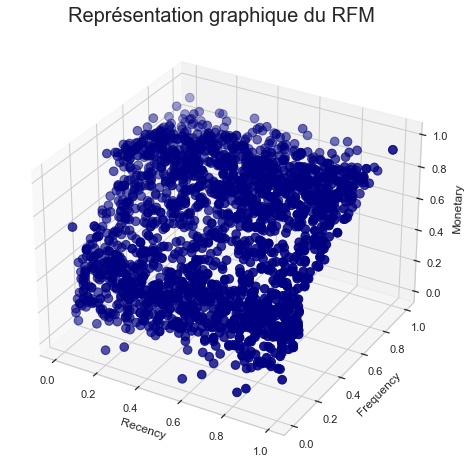

In [98]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(projection='3d')

im = ax.scatter(rfm_norm["Recency"],rfm_norm["Frequency"],rfm_norm["Monetary"],
               color = 'navy',s = 75)       
plt.title('Représentation graphique du RFM ',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.show()

In [99]:
# Définition de l'algorithme K-means :
def Kmeans_algo(data,n):
    """ Function for Kmeans Clustering."""
    
    kmeans_model = KMeans(n_clusters = n, init = 'k-means++', max_iter = 300,
                         random_state = 42, algorithm = 'elkan')
    kmeans_model.fit(data)
    
    # Centroïdes:
    centroids = kmeans_model.cluster_centers_
    
    # Noms:
    labels = kmeans_model.labels_
    rfm_norm['cluster'] = labels
    
    # Evaluation du modèle avec l'inertie et la score silhouett e:
    inertia = kmeans_model.inertia_
    sil_score = metrics.silhouette_score(data, labels)
    
    return inertia, labels, centroids, sil_score

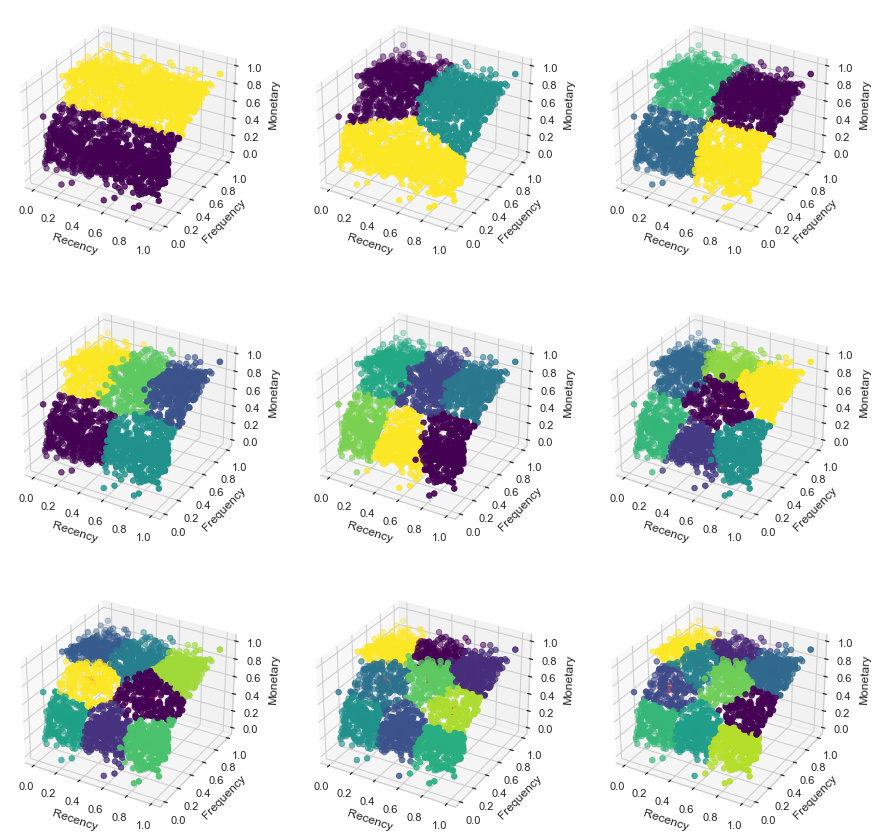

In [100]:
x3 = rfm_norm[['Recency','Frequency','Monetary']]
x3_interia_score = []
x3_s_score = []

fig = plt.figure(figsize = (15,15))

# Appel de la fonction :
for i in range(2,11):
    x3_interia, x3_lables, x3_centroids, x3_sil_score = Kmeans_algo(x3, i)
    x3_interia_score.append(x3_interia)
    x3_s_score.append(x3_sil_score)
    centroids_df = pd.DataFrame(x3_centroids, columns = ['Recency','Frequency','Monetary'])
    
    ax = fig.add_subplot(330 + i - 1, projection='3d')
    
    # Visualisation:
    ax.scatter(rfm_norm['Recency'],rfm_norm['Frequency'],rfm_norm['Monetary'],
                s = 30, c = rfm_norm["cluster"], cmap = "viridis")
    ax.scatter(centroids_df['Recency'], centroids_df['Frequency'], centroids_df['Monetary'], 
               s = 90, marker= ",", color = "r")
    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Monetary')

### Détermination du nombre de clusters
#### Méthode du coude

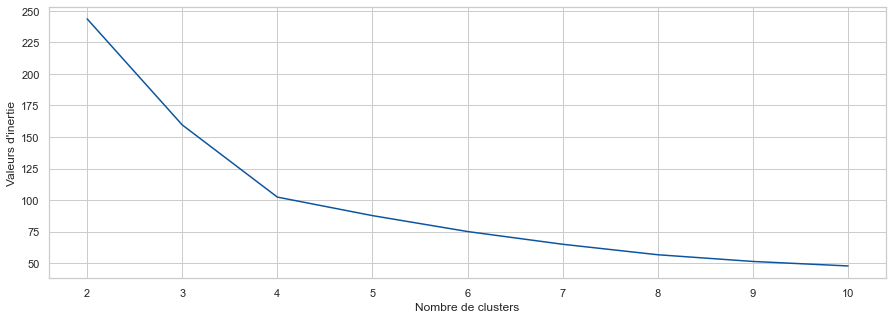

In [101]:
plt.figure(11, figsize = (15,5))
plt.plot(np.arange(2,11), x3_interia_score, '-')
plt.xlabel("Nombre de clusters")
plt.ylabel("Valeurs d'inertie");   

On peut facilement distinguer un coude à k = 4.

#### Score silhouette

"En clustering, le coefficient de silhouette est une mesure de qualité d'une partition d'un ensemble de données en classification automatique. Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation). 

Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. À l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé."

Source : https://fr.wikipedia.org/wiki/Silhouette_(clustering)

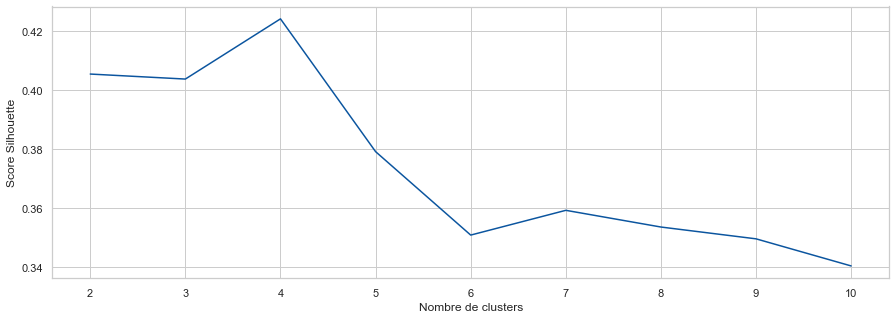

In [102]:
plt.figure(11, figsize=(15,5))
plt.plot(np.arange(2,11) , x3_s_score)
plt.xlabel("Nombre de clusters")
plt.ylabel("Score Silhouette");

Le score est à son maximum à k = 4, confirmant ainsi le choix de 4 clusters.

In [103]:
d1 = rfm_norm[['Recency','Frequency','Monetary']]
model1 = KMeans(n_clusters = 4, max_iter = 400, random_state = 42)
model1.fit(d1)
d1['clusters'] = model1.labels_
d1

Recency  Frequency  Monetary  clusters
0         0.0    0.43750  0.875577         2
1         0.0    0.53125  0.755931         2
2         0.0    0.31250  0.618550         1
3         0.0    0.09375  0.114709         1
4         0.0    0.18750  0.451795         1
...       ...        ...       ...       ...
2206      1.0    0.56250  0.785243         0
2207      1.0    0.12500  0.369639         3
2208      1.0    0.37500  0.652830         0
2209      1.0    0.59375  0.900431         0
2210      1.0    0.53125  0.859233         0

[2211 rows x 4 columns]

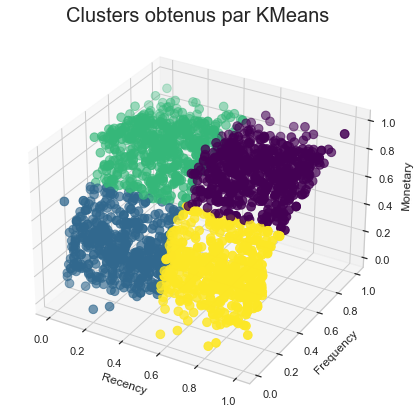

In [104]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(d1["Recency"], d1["Frequency"], d1["Monetary"],
               c = model1.labels_ , cmap = "viridis" ,s = 75)       
plt.title('Clusters obtenus par KMeans',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.show()

#### Clusters vs RFM

In [105]:
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('tab10')

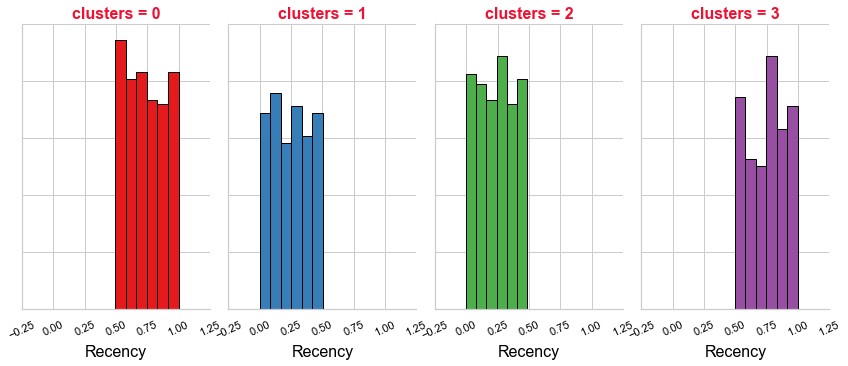

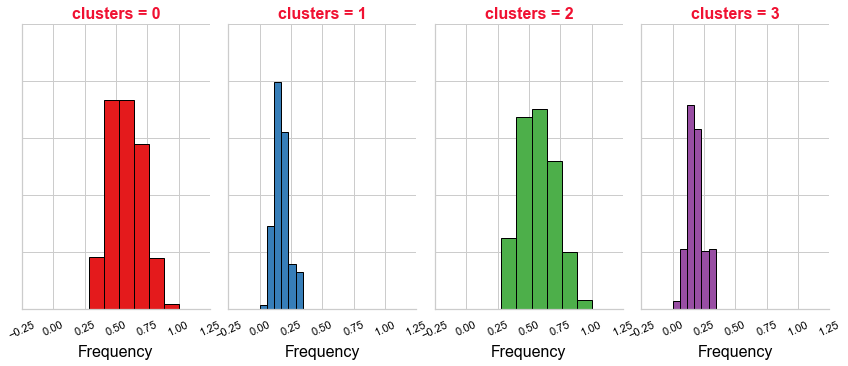

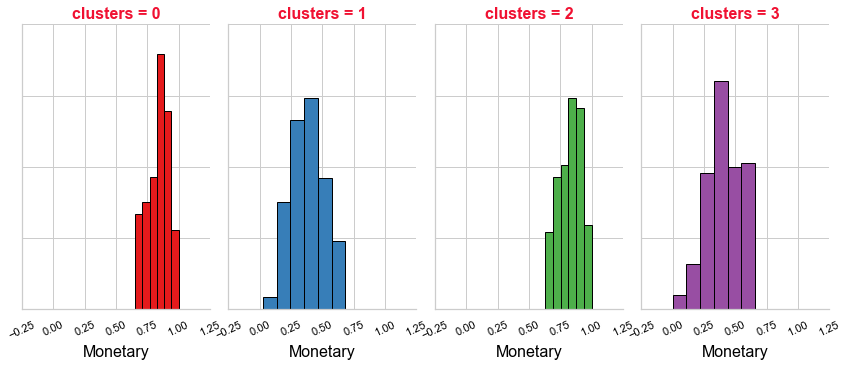

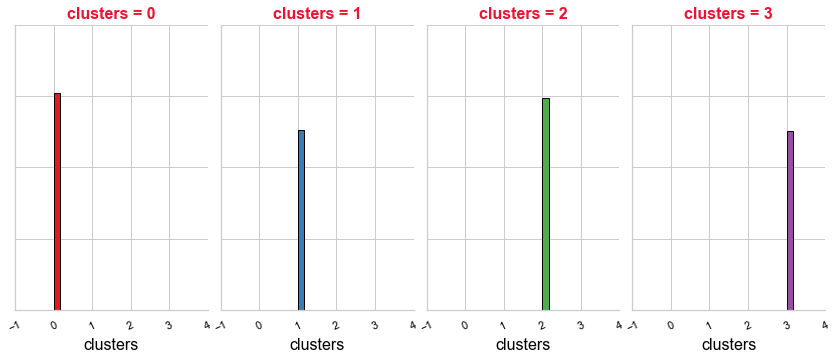

In [106]:
for i in d1:
    diag = sns.FacetGrid(d1, col = "clusters", hue = "clusters", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'black')
    diag.set_yticklabels(color = 'black')
    diag.set_xlabels(size=16, color = 'black')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

In [107]:
cluster_1 = d1.loc[d1['clusters'] == 0]
cluster_2 = d1.loc[d1['clusters'] == 1]
cluster_3 = d1.loc[d1['clusters'] == 2]
cluster_4 = d1.loc[d1['clusters'] == 3]

demo_c1 =pd.DataFrame(round(cluster_1.mean(),1),columns=['Average C1'])
demo_c2 =pd.DataFrame(round(cluster_2.mean(),1),columns=['Average C2'])
demo_c3 =pd.DataFrame(round(cluster_3.mean(),1),columns=['Average C3'])
demo_c4 =pd.DataFrame(round(cluster_4.mean(),1),columns=['Average C4'])

In [108]:
demo_clusts = [demo_c1["Average C1"], demo_c2["Average C2"], demo_c3["Average C3"], demo_c4["Average C4"]]
headers = ["Average C1", "Average C2", "Average C3", "Average C4"]

demo_clusts_final = pd.concat(demo_clusts, axis=1, keys=headers)
demo_clusts_final

#Recency 1 = meilleur score ; 
#Frequency 0 = meilleur score
#Monetary 0 = meilleur score

Average C1  Average C2  Average C3  Average C4
Recency           0.7         0.2         0.2         0.8
Frequency         0.6         0.2         0.6         0.2
Monetary          0.8         0.4         0.8         0.4
clusters          0.0         1.0         2.0         3.0

### Conclusions sur le clustering et recommandations

Les caractéristiques de chaque cluster permettent de dresser des portraits types de clients  : 
- Cluster 4 "champions/whales" : top clients dans toutes les catégories.
- Cluster 2 "at risk/lapsed" : top dépenses, top fréquence mais pas récent, risque de perdre ce client.
- Cluster 1 "new customers" : récent mais pas fréquent.
- Cluster 3 "hibernation" : score bas dans toutes les catégories.

Recommandations par cluster :
- Cluster 4 "champions/whales" : il est impératif de surveiller les baisses de récence, c’est notre groupe de clients le plus important.
- Cluster 2 "at risk/lapsed" : il faut les faire repasser à l'achat à l'aide de campagnes marketing : publicités personnalisées, promotions, demande de feedback.
- Cluster 1 "new customers" : fidéliser ces nouveaux clients, par exemple avec un e-mail personnalisé envoyé suite à leur récent achat.
- Cluster 3 "hibernation" : priorité plus faible car il est possible que rien ne permettra d'améliorer la performance de ces clients, demande davantage d'analyse (par exemple, demande de feedback).

### Clusters vs autres variables

In [109]:
df1 = pd.DataFrame(df_rfm)
df2 = pd.DataFrame(d1['clusters'])

final_df = pd.concat([df1,df2], axis = 1)

In [110]:
final_df.isnull().sum()

ID                        28
Year_Birth                28
Customer_age              28
Education                 28
Marital_Status            28
Income                    28
DependentHome             28
Dt_Customer               28
Customer_duration_days    28
Customer_Age_Enr          28
Recency                   28
MntWines                  28
MntFruits                 28
MntMeatProducts           28
MntFishProducts           28
MntSweetProducts          28
MntGoldProds              28
Monetary                  28
NumDealsPurchases         28
NumWebPurchases           28
NumCatalogPurchases       28
NumStorePurchases         28
TotalPurchases            28
NumWebVisitsMonth         28
AcceptedCmp1              28
AcceptedCmp2              28
AcceptedCmp3              28
AcceptedCmp4              28
AcceptedCmp5              28
TotalCampaignsAcc         28
Response                  28
Complain                  28
Country                   28
Frequency                 28
clusters      

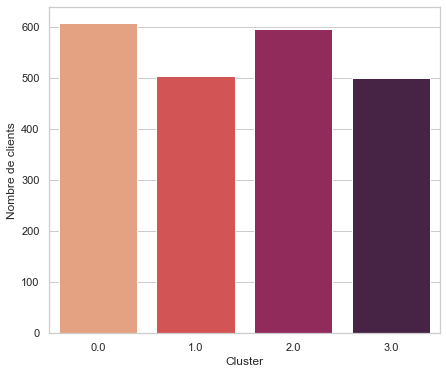

In [111]:
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('tab10')

plt.figure(figsize = (7, 6))
sns.countplot(x = final_df['clusters'], palette = 'rocket_r')
plt.xlabel('Cluster')
plt.ylabel('Nombre de clients');

In [112]:
final_chart = final_df.drop(['Dt_Customer', 'Country', 'Education', 'Marital_Status'], axis=1)

C:\Users\maxim\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



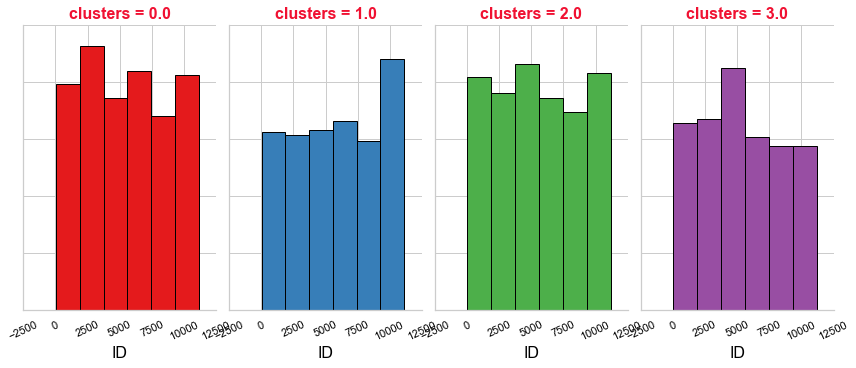

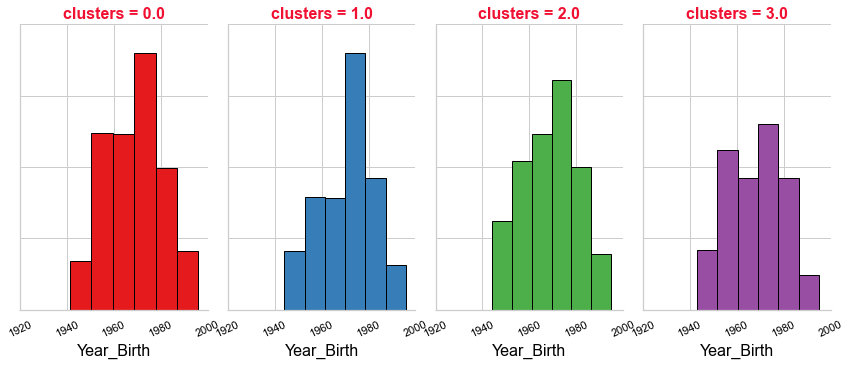

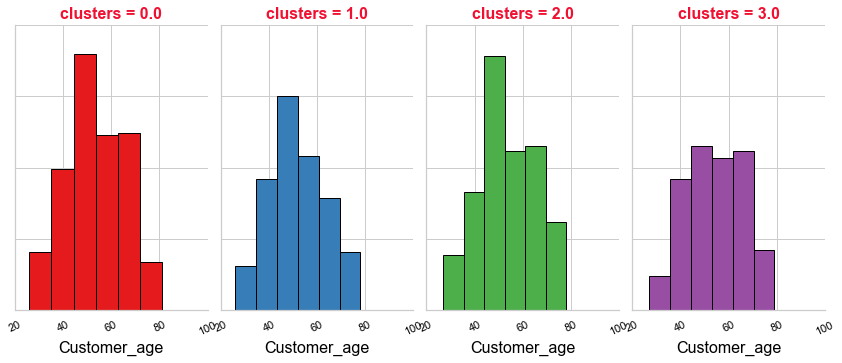

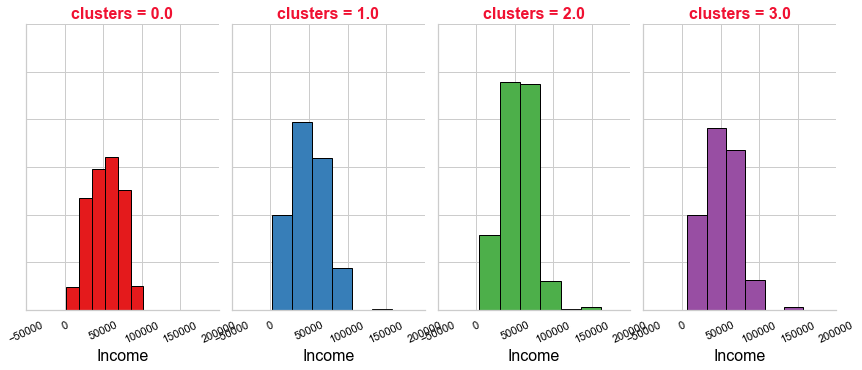

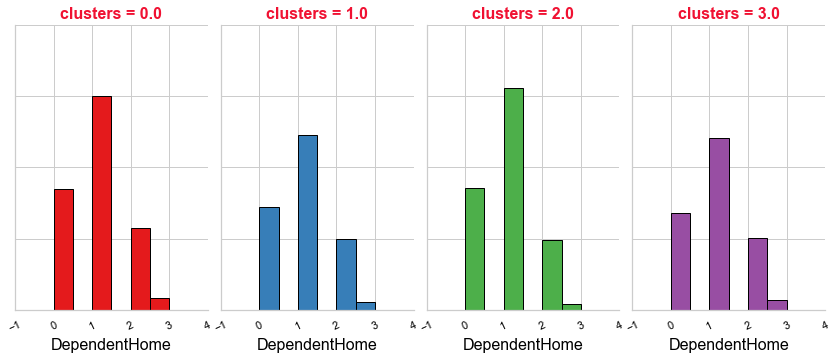

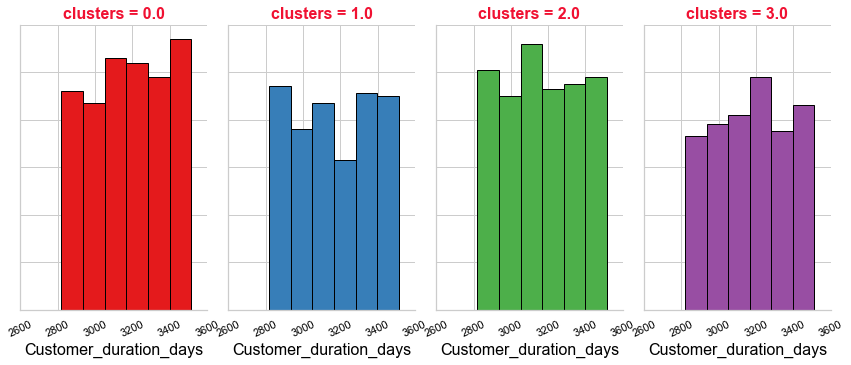

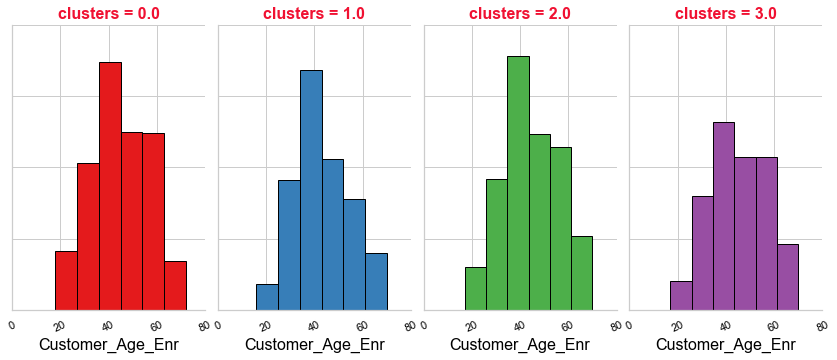

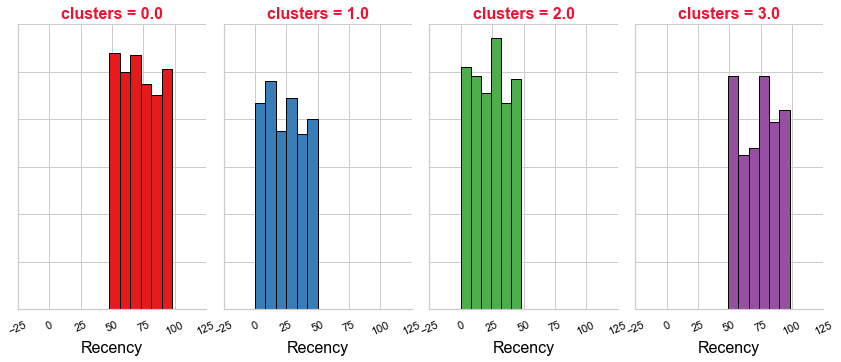

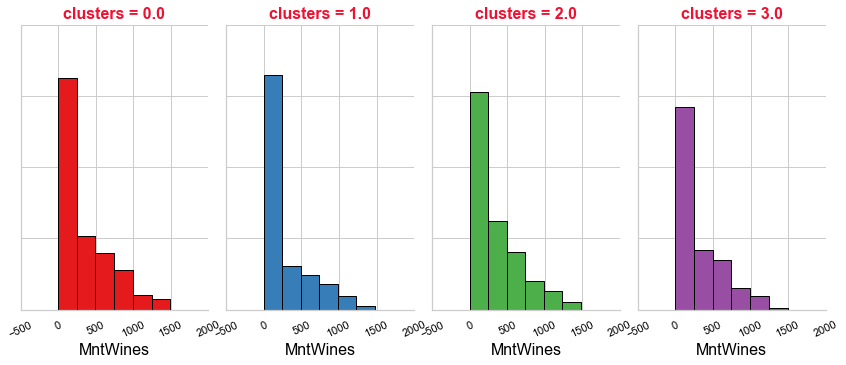

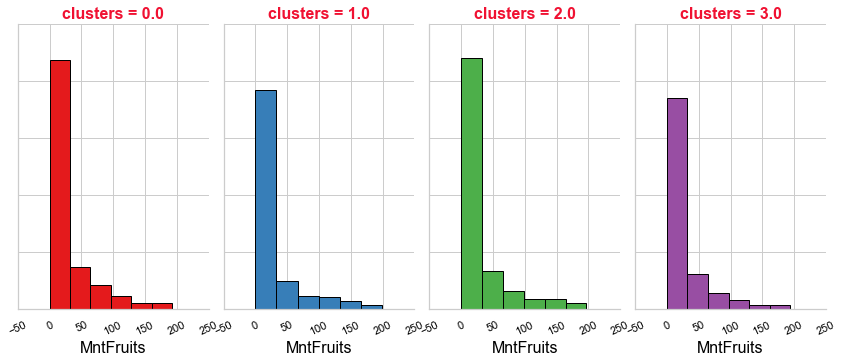

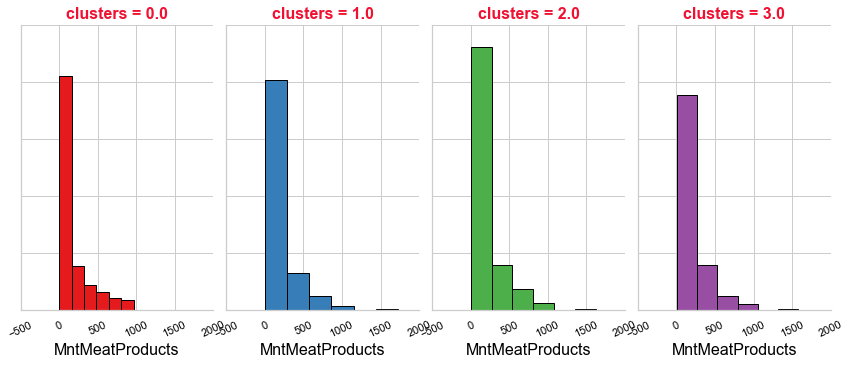

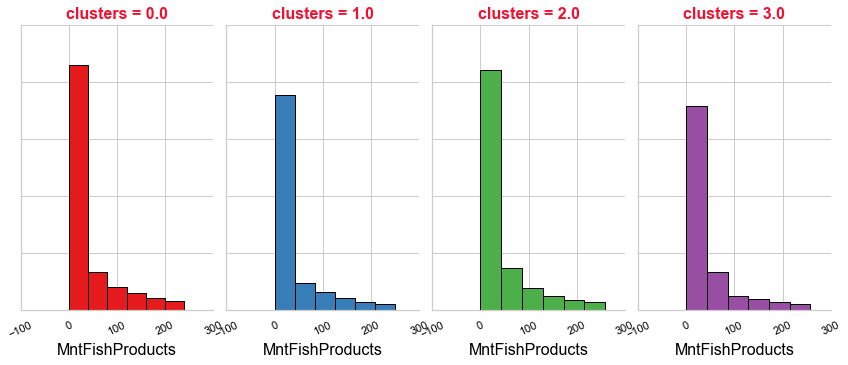

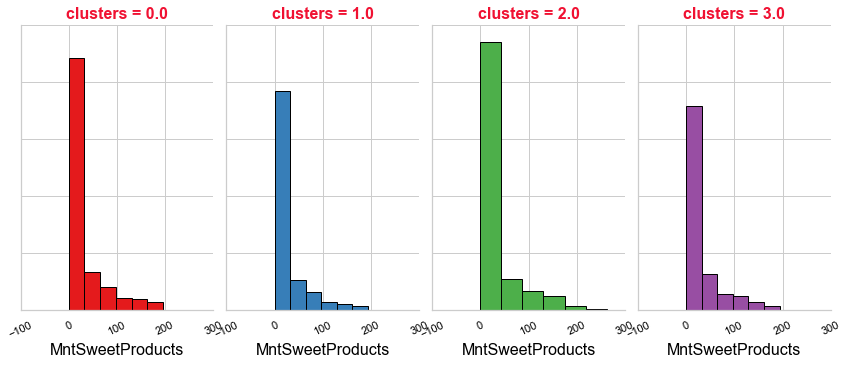

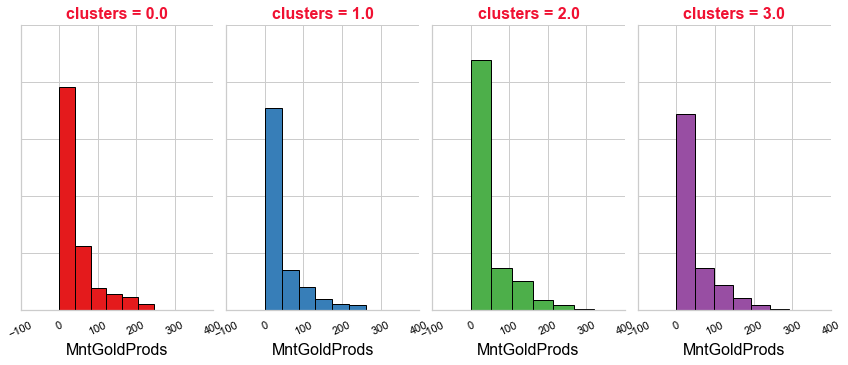

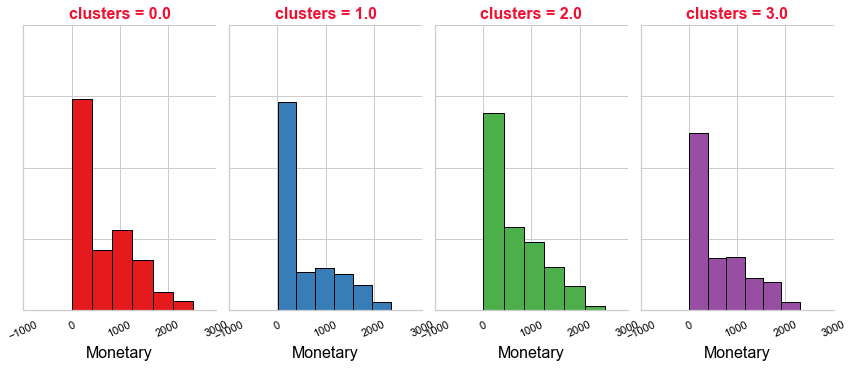

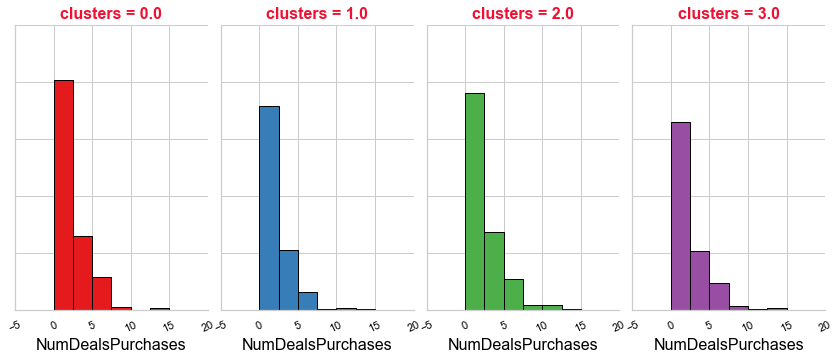

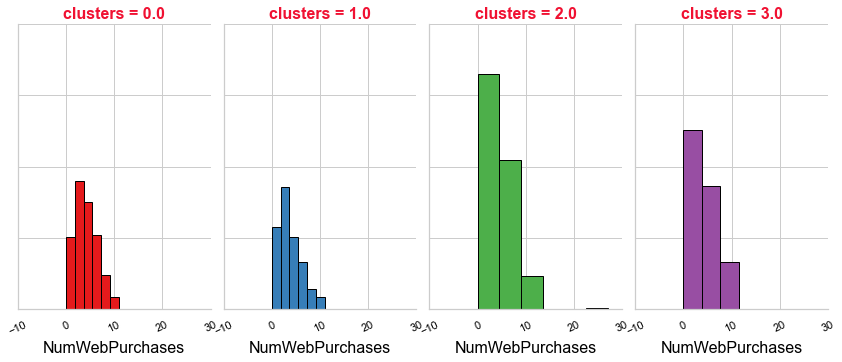

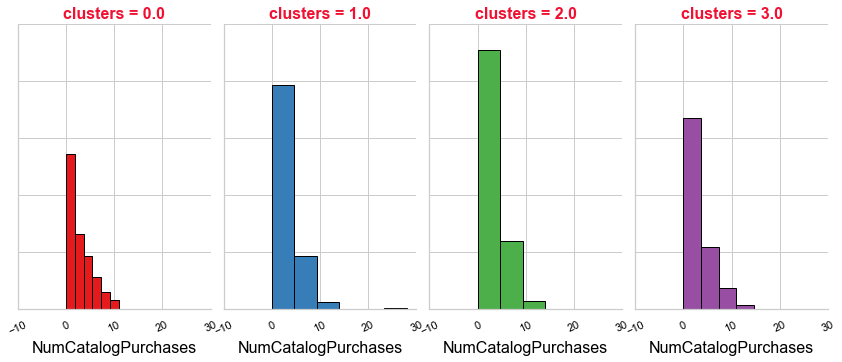

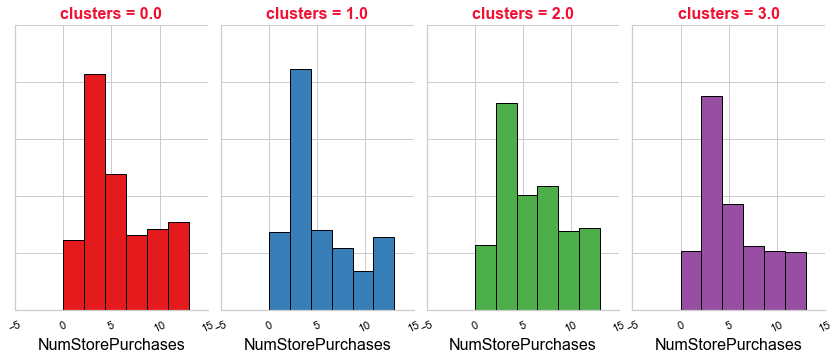

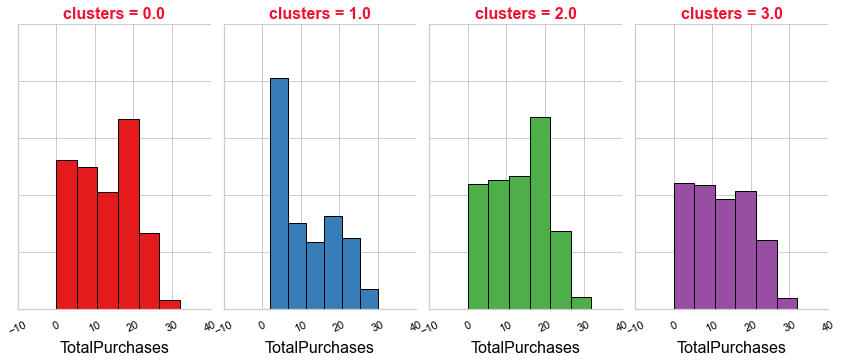

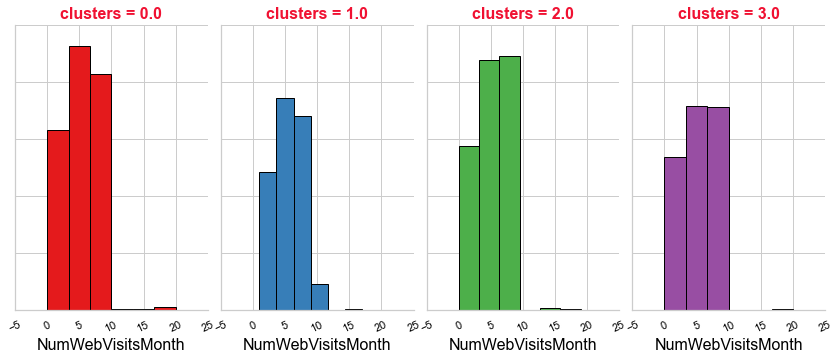

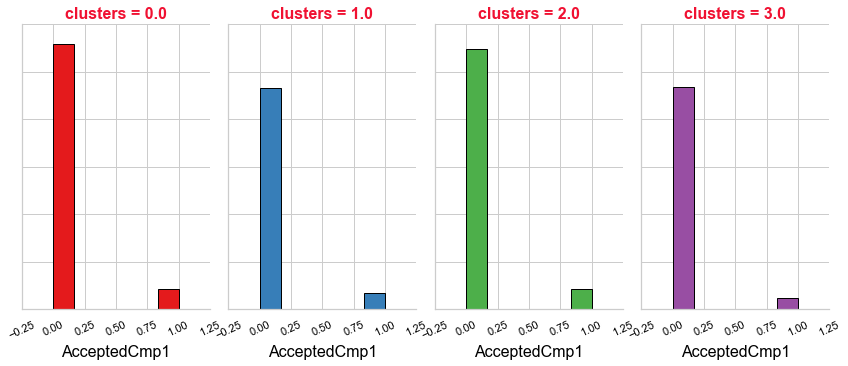

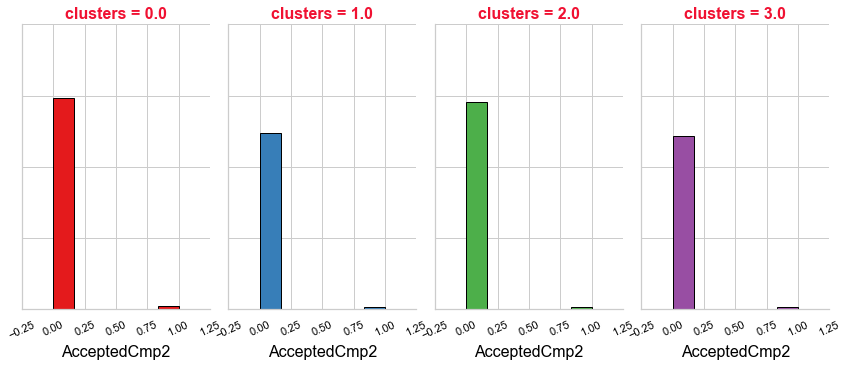

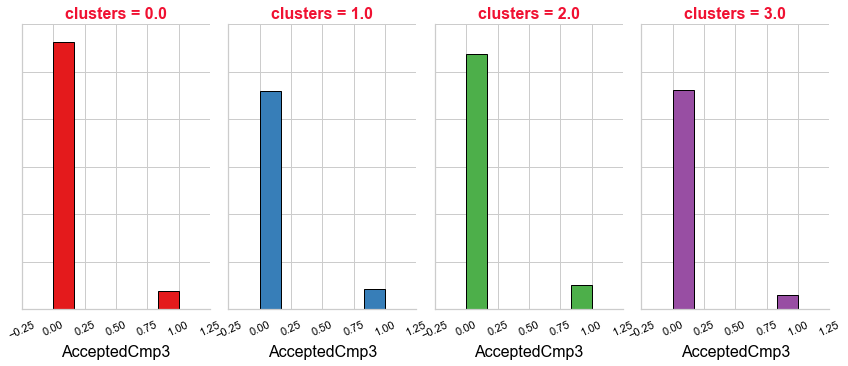

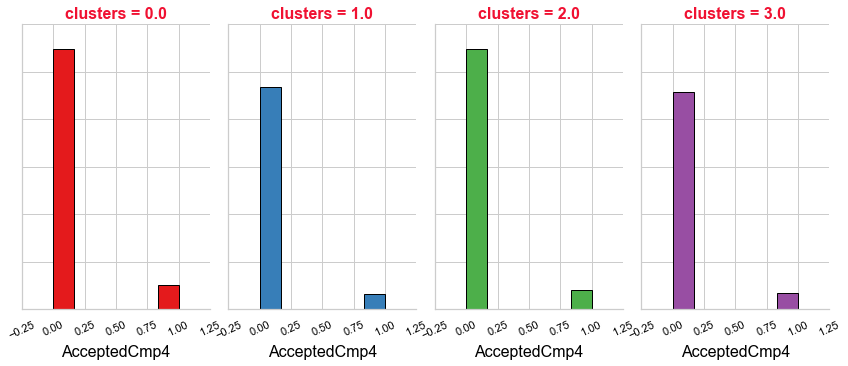

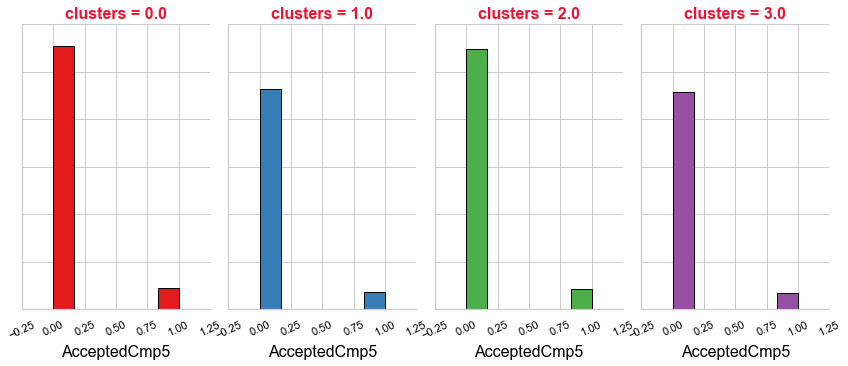

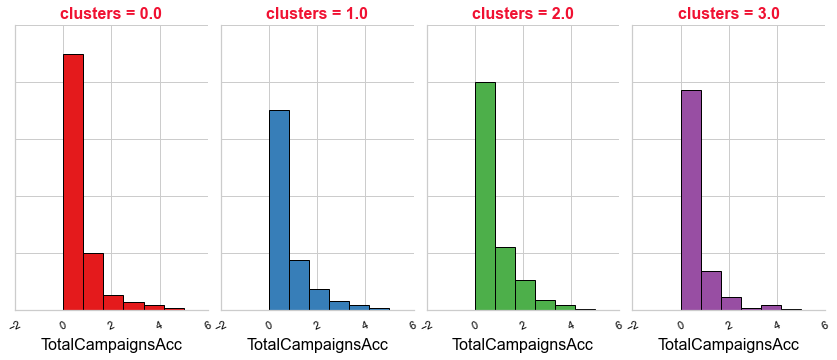

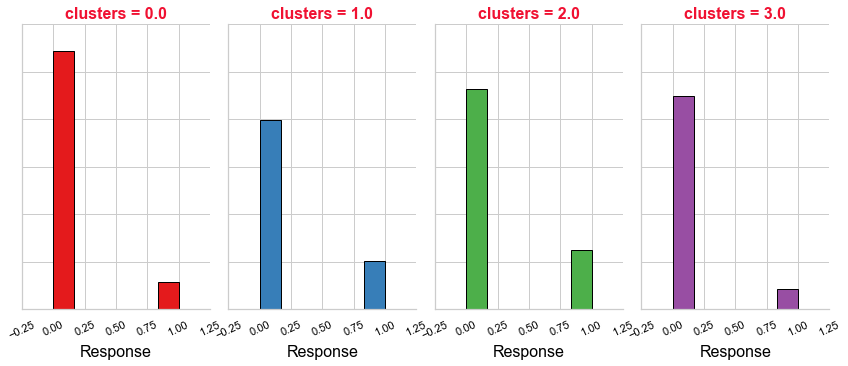

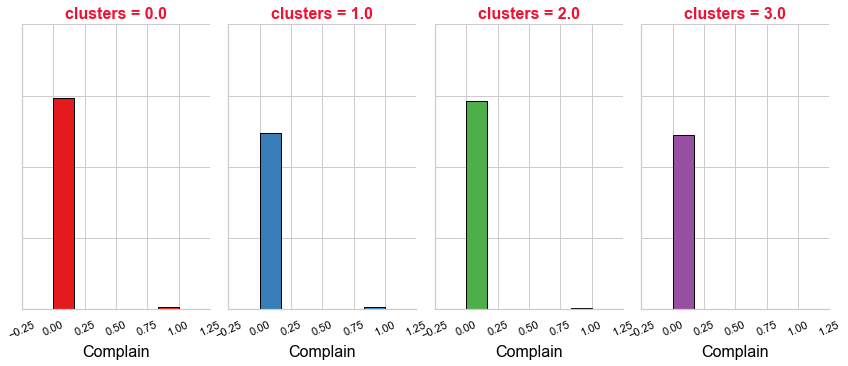

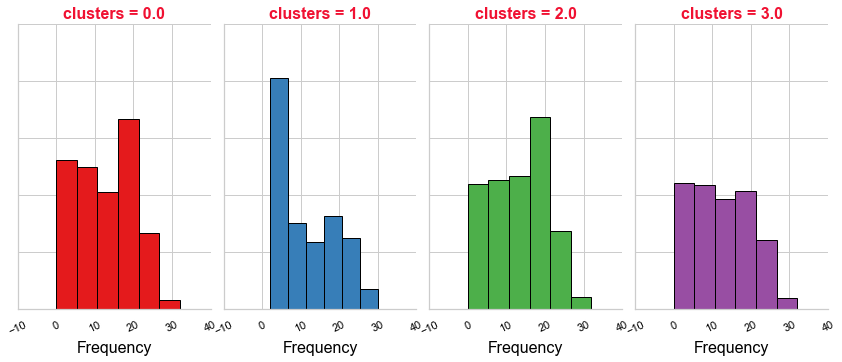

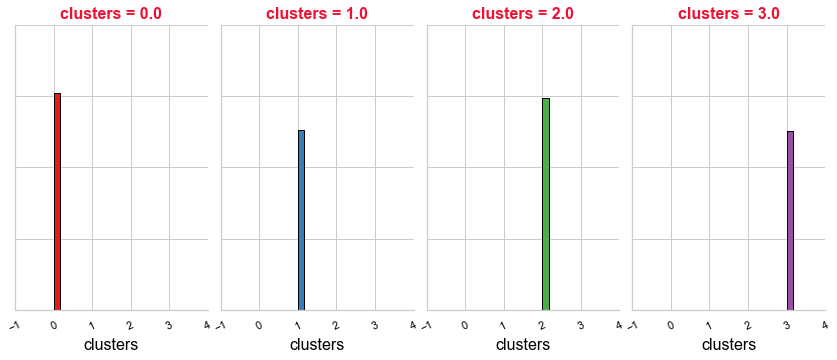

In [113]:
for i in final_chart:
    diag = sns.FacetGrid(final_chart, col = "clusters", hue = "clusters", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'black')
    diag.set_yticklabels(color = 'black')
    diag.set_xlabels(size=16, color = 'black')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

In [114]:
lr_final_df = final_df.copy()
lr_final_df = lr_final_df.drop(['ID','Year_Birth','Education','Marital_Status','Dt_Customer'], axis=1)
lr_final_df

Customer_age   Income  DependentHome  Customer_duration_days  \
0             52.0  84835.0            0.0                  2831.0   
1             61.0  57091.0            0.0                  2832.0   
2             64.0  67267.0            1.0                  2865.0   
3             55.0  32474.0            2.0                  2867.0   
4             33.0  21474.0            1.0                  2900.0   
...            ...      ...            ...                     ...   
2235          46.0  66476.0            1.0                  3297.0   
2236          45.0  31056.0            1.0                  3341.0   
2237          46.0  46310.0            1.0                  3391.0   
2238          44.0  65819.0            0.0                  3395.0   
2239          53.0  94871.0            2.0                  3484.0   

      Customer_Age_Enr  Recency  MntWines  MntFruits  MntMeatProducts  \
0                 44.0      0.0     189.0      104.0            379.0   
1                 53.0      0.0     464.0        5.0             64.0   
2                 56.0      0.0     134.0       11.0             59.0   
3                 47.0      0.0      10.0        0.0              1.0   
4                 25.0      0.0       6.0       16.0             24.0   
...                ...      ...       ...        ...              ...   
2235              37.0     99.0     372.0       18.0            126.0   
2236              36.0     99.0       5.0       10.0             13.0   
2237              36.0     99.0     185.0        2.0             88.0   
2238              34.0     99.0     267.0       38.0            701.0   
2239              43.0     99.0     169.0       24.0            553.0   

      MntFishProducts  MntSweetProducts  MntGoldProds  Monetary  \
0               111.0             189.0         218.0    1190.0   
1                 7.0               0.0          37.0     577.0   
2                15.0               2.0          30.0     251.0   
3                 0.0               0.0           0.0      11.0   
4                11.0               0.0          34.0      91.0   
...               ...               ...           ...       ...   
2235             47.0              48.0          78.0     689.0   
2236              3.0               8.0          16.0      55.0   
2237             15.0               5.0          14.0     309.0   
2238            149.0             165.0          63.0    1383.0   
2239            188.0               0.0         144.0    1078.0   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                   1.0              4.0                  4.0   
1                   1.0              7.0                  3.0   
2                   1.0              3.0                  2.0   
3                   1.0              1.0                  0.0   
4                   2.0              3.0                  1.0   
...                 ...              ...                  ...   
2235                2.0              5.0                  2.0   
2236                1.0              1.0                  0.0   
2237                2.0              6.0                  1.0   
2238                1.0              5.0                  4.0   
2239                1.0              8.0                  5.0   

      NumStorePurchases  TotalPurchases  NumWebVisitsMonth  AcceptedCmp1  \
0                   6.0            14.0                1.0           0.0   
1                   7.0            17.0                5.0           0.0   
2                   5.0            10.0                2.0           0.0   
3                   2.0             3.0                7.0           0.0   
4                   2.0             6.0                7.0           0.0   
...                 ...             ...                ...           ...   
2235               11.0            18.0                4.0           0.0   
2236                3.0             4.0                8.0           0.0   
2237              

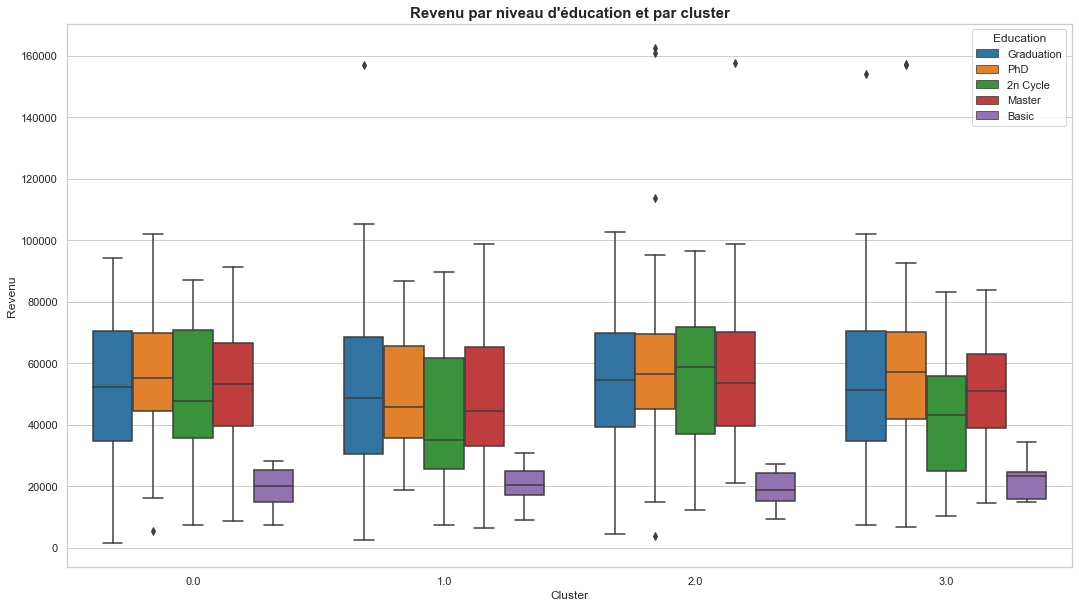

In [115]:
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('tab10')

plt.figure(figsize=(18,10))
sns.boxplot(x='clusters', y='Income', hue='Education',data=final_df)
plt.xlabel('Cluster')
plt.ylabel('Revenu')
plt.title("Revenu par niveau d'éducation et par cluster", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

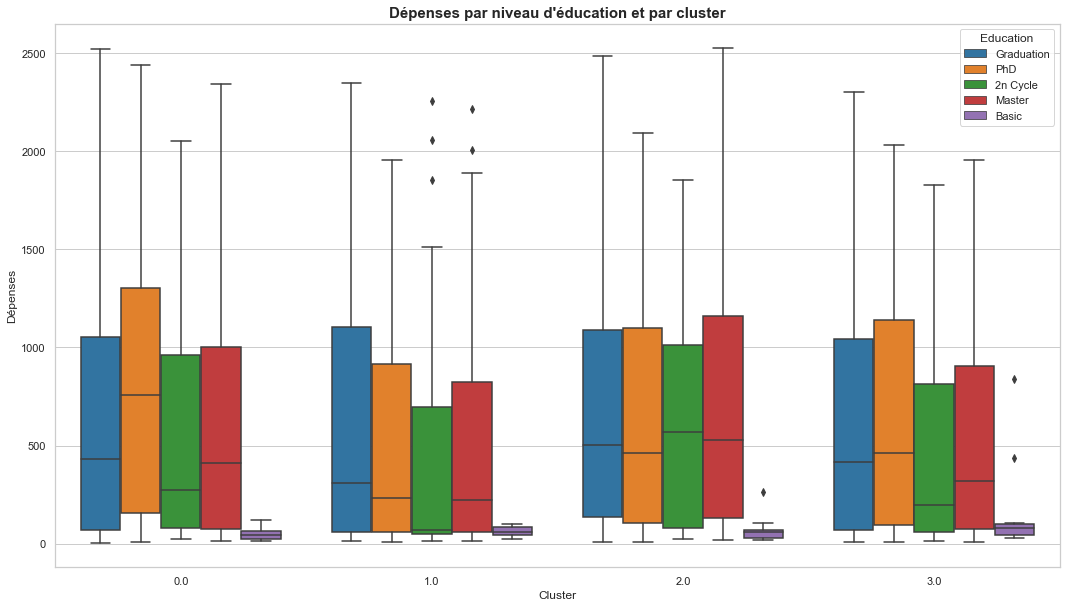

In [116]:
plt.figure(figsize=(18,10))
sns.boxplot(x='clusters', y='Monetary', hue='Education',data=final_df)
plt.xlabel('Cluster')
plt.ylabel('Dépenses')
plt.title("Dépenses par niveau d'éducation et par cluster", fontdict={'fontweight':'bold','fontsize':15})
plt.show()